<a href="https://colab.research.google.com/github/ManarCSAlharbi/Graph-Algorithms-Project/blob/main/Part_1_Classical_Computer_Vision_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *CPCS – 432 : Artificial Intelligence (II) 1st Semestre, 2026* (Part 1: Classical Computer Vision Pipeline)
> **Manar Abdullah Alharbi - 2206712 - CAR**

**Objective:**
The objective of this assignment is to apply classical and deep learning methods for feature
extraction and image classification. Students will implement classical methods such as HOG and
LBP, along with additional feature extraction methods of their choice, followed by image
classification using classifiers such as ANN, SVM, and KNN. In addition, CNN models will be
implemented with and without dropout layers.

# Task 1: Implementing Feature Extraction with Classifiers (ANN, SVM, KNN)
In this task, students will implement multiple feature extraction methods followed by the
application of classifiers:
1. **T1.1 Feature Extraction (HOG or LBP):** Apply Histogram of Oriented Gradients (HOG) or
Local Binary Patterns (LBP) to generate feature vectors and visualize the feature patterns for
three selected images.
2. **T1.2 Other Feature Extraction Methods:** Choose at least one from SIFT, SURF, ORB, or Gabor
filters.
3. **T1.3 - T1.5 Classifiers (ANN, SVM, KNN):** Train and evaluate the classifiers using the
extracted features.

# **1. Load the dataset**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("menakamohanakumar/derm7pt")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'derm7pt' dataset.
Path to dataset files: /kaggle/input/derm7pt


In [ ]:
import os
print(os.listdir(path))
# 1) Set the base folder that contains `release_v0/`
path = '/kaggle/input/derm7pt'
print(os.listdir(path))                #  include 'release_v0'
print(os.listdir(os.path.join(path, 'release_v0')))  # include 'images' and 'meta'


['release_v0']
['release_v0']
['meta', 'derm.html', 'README.txt', 'images', 'clinic.html']


> I applied the next code as described in the instructions for downloading and using the dataset from GitHub. The purpose of this step is to convert categorical columns into numerical ones, making it easier to implement and train the models later on.

> I applied this code as described in the instructions for downloading and using the dataset from GitHub. Its purpose is to convert categorical columns into numerical ones, making it easier to implement and train the models. During execution, an issue occurred because the source code used an outdated version of NumPy, which I fixed to ensure compatibility with the latest environment.

In [ ]:
# Fix for older code that expects NumPy < 2.0 - I Followed the instructions of the dataset provider at github , but there was an issues and i fixed it
import numpy as np
if not hasattr(np, "alltrue"):
    np.alltrue = np.all

# Get the repo if not already present
if not os.path.isdir('/content/derm7pt'):
    !git clone https://github.com/jeremykawahara/derm7pt.git /content/derm7pt

%cd /content/derm7pt

# Install without deps (the repo incorrectly depends on "sklearn" placeholder)
!pip install -q -e . --no-deps

# Make sure real deps exist
!pip install -q numpy matplotlib scikit-learn pandas

import sys
sys.path.insert(0, "/content/derm7pt")
import derm7pt
print("✅ derm7pt import:", derm7pt.__file__)


/content/derm7pt
  Preparing metadata (setup.py) ... done
✅ derm7pt import: /content/derm7pt/derm7pt/__init__.py


In [ ]:
# 2) Build paths and read meta
import os, pandas as pd

dir_release = os.path.join(path, 'release_v0')
meta_dir    = os.path.join(dir_release, 'meta')
images_dir  = os.path.join(dir_release, 'images')

meta_csv    = os.path.join(meta_dir, 'meta.csv')
train_csv   = os.path.join(meta_dir, 'train_indexes.csv')
valid_csv   = os.path.join(meta_dir, 'valid_indexes.csv')
test_csv    = os.path.join(meta_dir, 'test_indexes.csv')

metadata_df = pd.read_csv(meta_csv)
train_idx   = list(pd.read_csv(train_csv)['indexes'])
valid_idx   = list(pd.read_csv(valid_csv)['indexes'])
test_idx    = list(pd.read_csv(test_csv)['indexes'])

display(metadata_df.head())
print("Splits:", len(train_idx), len(valid_idx), len(test_idx))


case_num             diagnosis  seven_point_score pigment_network streaks  \
0         1  basal cell carcinoma                  0          absent  absent   
1         2  basal cell carcinoma                  1          absent  absent   
2         3  basal cell carcinoma                  1          absent  absent   
3         4  basal cell carcinoma                  4          absent  absent   
4         5  basal cell carcinoma                  1          absent  absent   

        pigmentation regression_structures dots_and_globules  \
0             absent                absent            absent   
1             absent                absent         irregular   
2             absent                absent         irregular   
3             absent            blue areas         irregular   
4  diffuse irregular                absent            absent   

  blue_whitish_veil vascular_structures level_of_diagnostic_difficulty  \
0            absent          arborizing                         medium   
1            absent              absent                            low   
2            absent          arborizing                         medium   
3           present   within regression                            low   
4            absent              absent                           high   

  elevation     location     sex management          clinic            derm  \
0   nodular      abdomen  female   excision  NEL/NEL025.JPG  NEL/Nel026.jpg   
1  palpable    head neck  female   excision  NEL/NEL027.JPG  NEL/Nel028.jpg   
2  palpable    head neck  female   excision  NEL/Nel032.jpg  NEL/Nel033.jpg   
3  palpable  lower limbs    male   excision  NEL/NEL034.JPG  NEL/Nel035.jpg   
4  palpable  upper limbs  female   excision  NEL/NEL036.JPG  NEL/Nel037.jpg   

  case_id notes  
0     NaN   NaN  
1     NaN   NaN  
2     NaN   NaN  
3     NaN   NaN  
4     NaN   NaN

Splits: 413 203 395


In [ ]:
# 3) Minimal Example: create the dataset object (1-3 from the steps on github of the dataset)
from derm7pt.dataset import Derm7PtDatasetGroupInfrequent

derm_data = Derm7PtDatasetGroupInfrequent(
    dir_images=images_dir,
    metadata_df=metadata_df,
    train_indexes=train_idx,
    valid_indexes=valid_idx,
    test_indexes=test_idx
)


# **2. Explore the datset**




> # 2.1 **Exploring the metadata**










In [ ]:
# Display the first few rows of the dataframe
print("First 5 rows of the dataframe:")
display(derm_data.df.head())

# Get the shape of the dataframe (number of rows and columns)
print("\nShape of the dataframe (rows, columns):")
print(derm_data.df.shape)

# Get information about the dataframe, including data types and non-null values
print("\nInformation about the dataframe:")
derm_data.df.info()

# Get descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(derm_data.df.describe())

# Get the unique values and their counts for the 'diagnosis' column
print("\nValue counts for the 'diagnosis' column:")
display(derm_data.df['diagnosis'].value_counts())

First 5 rows of the dataframe:


case_num             diagnosis  seven_point_score pigment_network streaks  \
0         1  basal cell carcinoma                  0          absent  absent   
1         2  basal cell carcinoma                  1          absent  absent   
2         3  basal cell carcinoma                  1          absent  absent   
3         4  basal cell carcinoma                  4          absent  absent   
4         5  basal cell carcinoma                  1          absent  absent   

        pigmentation regression_structures dots_and_globules  \
0             absent                absent            absent   
1             absent                absent         irregular   
2             absent                absent         irregular   
3             absent            blue areas         irregular   
4  diffuse irregular                absent            absent   

  blue_whitish_veil vascular_structures  ... case_id notes diagnosis_numeric  \
0            absent          arborizing  ...     NaN   NaN                 0   
1            absent              absent  ...     NaN   NaN                 0   
2            absent          arborizing  ...     NaN   NaN                 0   
3           present   within regression  ...     NaN   NaN                 0   
4            absent              absent  ...     NaN   NaN                 0   

  pigment_network_numeric blue_whitish_veil_numeric  \
0                       0                         0   
1                       0                         0   
2                       0                         0   
3                       0                         1   
4                       0                         0   

  vascular_structures_numeric pigmentation_numeric streaks_numeric  \
0                           1                    0               0   
1                           0                    0               0   
2                           1                    0               0   
3                           1                    0               0   
4                           0                    2               0   

  dots_and_globules_numeric  regression_structures_numeric  
0                         0                              0  
1                         2                              0  
2                         2                              0  
3                         2                              1  
4                         0                              0  

[5 rows x 27 columns]


Shape of the dataframe (rows, columns):
(1011, 27)

Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   case_num                        1011 non-null   int64 
 1   diagnosis                       1011 non-null   object
 2   seven_point_score               1011 non-null   int64 
 3   pigment_network                 1011 non-null   object
 4   streaks                         1011 non-null   object
 5   pigmentation                    1011 non-null   object
 6   regression_structures           1011 non-null   object
 7   dots_and_globules               1011 non-null   object
 8   blue_whitish_veil               1011 non-null   object
 9   vascular_structures             1011 non-null   object
 10  level_of_diagnostic_difficulty  1011 non-null   object
 11  elevation             

case_num  seven_point_score  diagnosis_numeric  \
count  1011.000000        1011.000000        1011.000000   
mean    506.000000           2.224530           1.533136   
std     291.994863           2.233417           0.889788   
min       1.000000           0.000000           0.000000   
25%     253.500000           0.000000           1.000000   
50%     506.000000           2.000000           1.000000   
75%     758.500000           4.000000           2.000000   
max    1011.000000          10.000000           4.000000   

       pigment_network_numeric  blue_whitish_veil_numeric  \
count               1011.00000                1011.000000   
mean                   0.83185                   0.192878   
std                    0.77166                   0.394754   
min                    0.00000                   0.000000   
25%                    0.00000                   0.000000   
50%                    1.00000                   0.000000   
75%                    1.00000                   0.000000   
max                    2.00000                   1.000000   

       vascular_structures_numeric  pigmentation_numeric  streaks_numeric  \
count                  1011.000000           1011.000000      1011.000000   
mean                      0.256182              0.720079         0.602374   
std                       0.575618              0.897622         0.858363   
min                       0.000000              0.000000         0.000000   
25%                       0.000000              0.000000         0.000000   
50%                       0.000000              0.000000         0.000000   
75%                       0.000000              2.000000         1.000000   
max                       2.000000              2.000000         2.000000   

       dots_and_globules_numeric  regression_structures_numeric  
count                1011.000000                    1011.000000  
mean                    1.216617                       0.250247  
std                     0.789511                       0.433370  
min                     0.000000                       0.000000  
25%                     1.000000                       0.000000  
50%                     1.000000                       0.000000  
75%                     2.000000                       0.500000  
max                     2.000000                       1.000000


Value counts for the 'diagnosis' column:


diagnosis
clark nevus                     399
melanoma (less than 0.76 mm)    102
reed or spitz nevus              79
melanoma (in situ)               64
melanoma (0.76 to 1.5 mm)        53
seborrheic keratosis             45
basal cell carcinoma             42
dermal nevus                     33
vascular lesion                  29
blue nevus                       28
melanoma (more than 1.5 mm)      28
lentigo                          24
dermatofibroma                   20
congenital nevus                 17
melanosis                        16
combined nevus                   13
miscellaneous                     8
recurrent nevus                   6
melanoma metastasis               4
melanoma                          1
Name: count, dtype: int64






> # 2.2 **Exploring the Images**


Explore the images in the dataset by displaying one sample image for each unique diagnosis type.


## 2.1 Get unique diagnoses


Obtain a list of all unique diagnoses from the dataframe.


Obtain the list of unique diagnoses from the dataframe to prepare for displaying sample images for each diagnosis type.



In [ ]:
# Access the dataframe and get unique diagnoses
unique_diagnoses = derm_data.df['diagnosis'].unique().tolist()

# Print the unique diagnoses
print("Unique diagnoses in the dataset:")
print(unique_diagnoses)

Unique diagnoses in the dataset:
['basal cell carcinoma', 'blue nevus', 'clark nevus', 'combined nevus', 'congenital nevus', 'dermal nevus', 'dermatofibroma', 'lentigo', 'melanoma (in situ)', 'melanoma (less than 0.76 mm)', 'melanoma (0.76 to 1.5 mm)', 'melanoma (more than 1.5 mm)', 'melanoma metastasis', 'melanosis', 'miscellaneous', 'recurrent nevus', 'reed or spitz nevus', 'seborrheic keratosis', 'vascular lesion', 'melanoma']


## 2.2 Iterate through diagnoses


Loop through each unique diagnosis.


In [ ]:
for diagnosis in unique_diagnoses:
    print(f"Processing diagnosis: {diagnosis}")
print("number of diagnosis types: "+str(len(unique_diagnoses)))

Processing diagnosis: basal cell carcinoma
Processing diagnosis: blue nevus
Processing diagnosis: clark nevus
Processing diagnosis: combined nevus
Processing diagnosis: congenital nevus
Processing diagnosis: dermal nevus
Processing diagnosis: dermatofibroma
Processing diagnosis: lentigo
Processing diagnosis: melanoma (in situ)
Processing diagnosis: melanoma (less than 0.76 mm)
Processing diagnosis: melanoma (0.76 to 1.5 mm)
Processing diagnosis: melanoma (more than 1.5 mm)
Processing diagnosis: melanoma metastasis
Processing diagnosis: melanosis
Processing diagnosis: miscellaneous
Processing diagnosis: recurrent nevus
Processing diagnosis: reed or spitz nevus
Processing diagnosis: seborrheic keratosis
Processing diagnosis: vascular lesion
Processing diagnosis: melanoma
number of diagnosis types: 20


## 2.3 Display the images

* For each diagnosis, find the filename of one image associated with that diagnosis from the dataframe.

* Create the full path to the image file using the image directory path and the filename.

* Load and display the image with its diagnosis as the title.


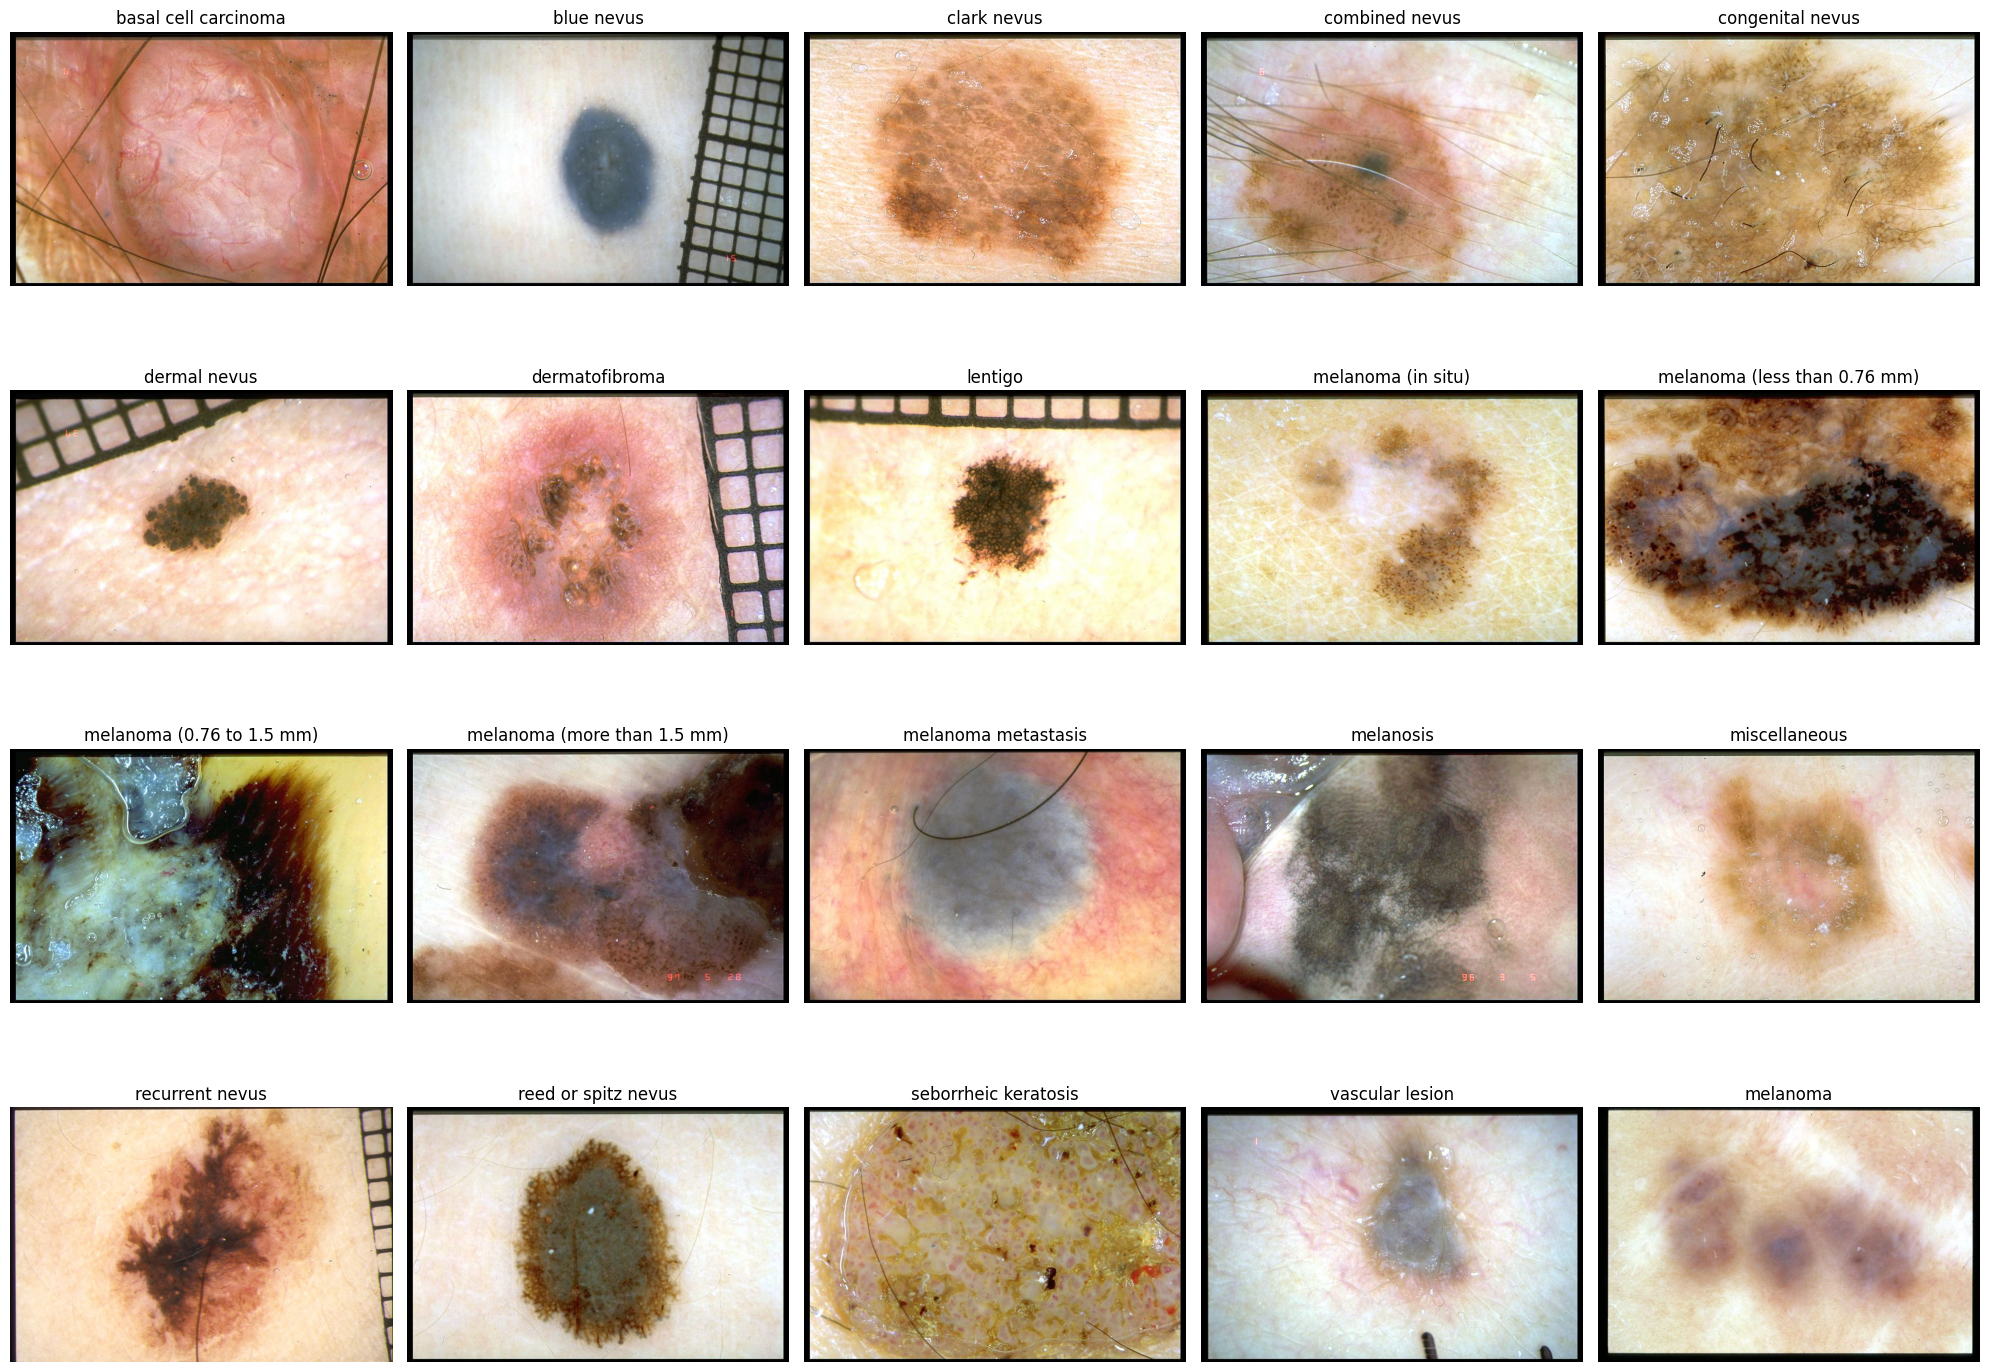

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np



plt.figure(figsize=(20, 15))

for i, diagnosis in enumerate(unique_diagnoses):
    # Filter the DataFrame for the current diagnosis
    filtered_df = derm_data.df[derm_data.df['diagnosis'] == diagnosis]

    # Get the first image filename for this diagnosis
    if not filtered_df.empty:
        sample_image_filename = filtered_df['derm'].iloc[0]

        # Construct the full image path
        image_path = os.path.join(images_dir, sample_image_filename)

        # Load and display the image
        try:
            img = Image.open(image_path)
            plt.subplot(4, 5, i + 1) # Adjust subplot grid based on the number of unique diagnoses
            plt.imshow(img)
            plt.title(f"{diagnosis}")
            plt.axis('off')
        except FileNotFoundError:
            print(f"Image file not found for diagnosis '{diagnosis}': {image_path}")
        except Exception as e:
            print(f"Error loading image for diagnosis '{diagnosis}': {e}")


plt.tight_layout()
plt.show()


#  **3. Preprossing the images**
**Here, I only wanted to visualize the result of resizing and normalizing. I followed the same process and applied it to the models as well.**

## 3.1 standraizing the images sizes

### 3.1.1 first cheack the sizes

In [ ]:
from collections import Counter

image_sizes = []
pixel_sum = 0
num_pixels = 0

print("Processing images...")

# Iterate through each row in the dataframe to access image information
for index, row in derm_data.df.iterrows():
    image_filename = row['derm']
    image_path = os.path.join(images_dir, image_filename)

    try:
        img = Image.open(image_path)
        image_sizes.append(img.size)

        # Convert image to numpy array and calculate sum of pixel values
        img_arr = np.array(img)
        pixel_sum += np.sum(img_arr)
        num_pixels += img_arr.size

    except FileNotFoundError:
        print(f"Warning: Image file not found for {image_filename}")
    except Exception as e:
        print(f"Error processing image {image_filename}: {e}")

print("Finished processing images.")

# Calculate and print unique image sizes and their counts
size_counts = Counter(image_sizes)
print("\nUnique image sizes and their counts:")
for size, count in size_counts.items():
    print(f"Size: {size}, Count: {count}")

# Find the most common image size
if size_counts:
    most_common_size = size_counts.most_common(1)
    print(f"\nMost common image size: {most_common_size[0][0]} (occurrences: {most_common_size[0][1]})")
else:
    print("\nNo image sizes recorded.")

# Calculate and print the total sum of pixel values
print(f"\nTotal sum of pixel values: {pixel_sum}")

# Calculate and print the average pixel value
if num_pixels > 0:
    average_pixel_value = pixel_sum / num_pixels
    print(f"Average pixel value: {average_pixel_value:.2f}")
else:
    print("No pixels processed.")

Processing images...
Finished processing images.

Unique image sizes and their counts:
Size: (768, 512), Count: 941
Size: (768, 511), Count: 57
Size: (767, 508), Count: 3
Size: (768, 502), Count: 1
Size: (512, 512), Count: 1
Size: (768, 509), Count: 2
Size: (768, 532), Count: 1
Size: (759, 510), Count: 1
Size: (626, 474), Count: 1
Size: (754, 512), Count: 1
Size: (692, 482), Count: 1
Size: (756, 513), Count: 1

Most common image size: (768, 512) (occurrences: 941)

Total sum of pixel values: 202662775213
Average pixel value: 170.08




### 3.1.2 standraizing the images sizes





Original image size: (768, 512)
Resized image size: (128, 128)


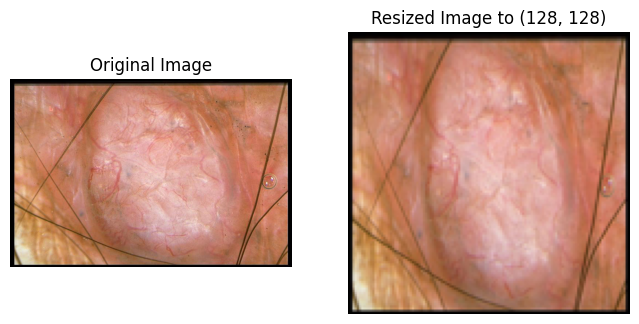

In [ ]:
# Define the target size for the images
target_size = (128, 128)


sample_image_filename = derm_data.df.loc[0, 'derm']
sample_image_path = os.path.join(images_dir, sample_image_filename)


try:
    # Load the image
    img = Image.open(sample_image_path)

    # Print the original size
    print(f"Original image size: {img.size}")

    # Resize the image
    resized_img = img.resize(target_size)

    # Print the new size
    print(f"Resized image size: {resized_img.size}")

    # Display the original and resized images
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(resized_img)
    plt.title(f"Resized Image to {target_size}")
    plt.axis('off')

    plt.show()

except FileNotFoundError:
    print(f"Error: The file was not found at {sample_image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

## 3.2 Normalize the pixel values to the range [0, 1]

Original pixel value range: min=0, max=255
Normalized pixel value range: min=0.0, max=1.0


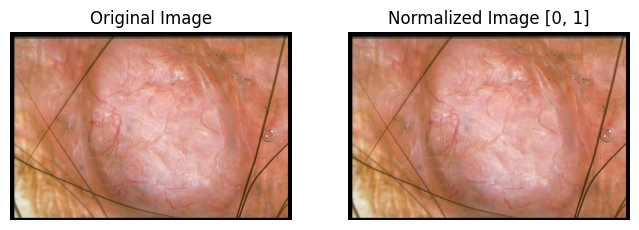

In [ ]:
sample_image_filename = derm_data.df.loc[0, 'derm']
sample_image_path = os.path.join(images_dir, sample_image_filename)

    # Load the image
img = Image.open(sample_image_path)

    # Convert the image to a NumPy array
img_arr = np.array(img)

    # Print the original pixel value range
print(f"Original pixel value range: min={img_arr.min()}, max={img_arr.max()}")

    # Normalize the pixel values to the range [0, 1]
normalized_img_arr = img_arr / 255.0

    # Print the normalized pixel value range
print(f"Normalized pixel value range: min={normalized_img_arr.min()}, max={normalized_img_arr.max()}")

    # Display the original and normalized images (note: displaying normalized float images might look different)
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_img_arr)
plt.title("Normalized Image [0, 1]")
plt.axis('off')

plt.show()




# **Part 1: Classical Computer Vision Pipeline**

### T1.1 Feature Extraction (**HOG**)

> **STEP1: Import libraries**



In [ ]:

# Import necessary libraries
import numpy as np  # Work with multi-dimensional arrays and matrices.
import matplotlib.pyplot as plt
from skimage.feature import hog
from   sklearn.metrics   import confusion_matrix, accuracy_score
from   sklearn.neighbors import KNeighborsClassifier
from   sklearn.svm       import LinearSVC
from   sklearn           import svm, metrics
from skimage import exposure
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [ ]:
!pip install seaborn

> **Step 2: Define HOG Feature Extraction Function**
The function `extract_hog_features` takes a batch of images and extracts HOG descriptors for each image, which will be used as the input for the ANN.

In [ ]:
# Function to extract HOG features from images
def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Normalize the image
        img = img / 255.0
        # Extract HOG features with channel_axis specified for color images
        feature, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2), visualize=True, channel_axis=2) # Added channel_axis=2
        hog_features.append(feature)
    return np.array(hog_features)

In [ ]:
# Separate features (X) and target (y)
#'diagnosis' is the target variable
X = derm_data.df.drop(['diagnosis', 'diagnosis_numeric'], axis=1)
y = derm_data.df['diagnosis_numeric']
print()

# Split the data into training, validation, and testing sets using the provided indexes
X_train = X.iloc[train_idx]
y_train = y.iloc[train_idx]

X_valid = X.iloc[valid_idx]
y_valid = y.iloc[valid_idx]

X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]

# Print the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_valid:", X_valid.shape)
print("Shape of y_valid:", y_valid.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (413, 25)
Shape of y_train: (413,)
Shape of X_valid: (203, 25)
Shape of y_valid: (203,)
Shape of X_test: (395, 25)
Shape of y_test: (395,)


**Step 3: Load and Preprocess the data**
convert the images to HOG features using the function defined above. Also, one-hot encode the labels using `to_categorical`.

In [ ]:

# Function to load and prepare images (resize and normalize)
def load_and_prepare_images(indexes, dataframe, images_dir):
    images = []
    for index in indexes:
        image_filename = dataframe.loc[index, 'derm']
        image_path = os.path.join(images_dir, image_filename)
        try:
            img = Image.open(image_path) # Load image

            img = img.resize((128, 128)) # i already adjust the target size

            # Convert the image to a numpy array
            img_array = np.array(img)
            images.append(img_array)
        except FileNotFoundError:
            print(f"Warning: Image file not found for index {index}: {image_path}")
            continue
        except Exception as e:
            print(f"Error processing image for index {index}: {e}")
            continue

    return images

# 1- Load and prepare images for each split
train_images = load_and_prepare_images(train_idx, derm_data.df, images_dir)
valid_images = load_and_prepare_images(valid_idx, derm_data.df, images_dir)
test_images = load_and_prepare_images(test_idx, derm_data.df, images_dir)


# 2- Convert images to HOG features using the extract_hog_features function
# Note: The extract_hog_features function expects a list of numpy arrays
x_train_hog = extract_hog_features(train_images)
x_valid_hog = extract_hog_features(valid_images)
x_test_hog = extract_hog_features(test_images)


# 3- Convert labels to one-hot encoded format
#  y_train, y_valid, y_test are already pandas Series or numpy arrays
num_classes = len(derm_data.df['diagnosis'].unique()) # Get the number of unique diagnoses
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_valid_one_hot = to_categorical(y_valid, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)


# Print the shape of the extracted HOG features
print(f"Shape of training HOG feature set: {x_train_hog.shape}")
print(f"Shape of validation HOG feature set: {x_valid_hog.shape}")
print(f"Shape of testing HOG feature set: {x_test_hog.shape}")

# Print the shape of the one-hot encoded labels
print(f"Shape of one-hot encoded training labels: {y_train_one_hot.shape}")
print(f"Shape of one-hot encoded validation labels: {y_valid_one_hot.shape}")
print(f"Shape of one-hot encoded testing labels: {y_test_one_hot.shape}")

Shape of training HOG feature set: (413, 8100)
Shape of validation HOG feature set: (203, 8100)
Shape of testing HOG feature set: (395, 8100)
Shape of one-hot encoded training labels: (413, 20)
Shape of one-hot encoded validation labels: (203, 20)
Shape of one-hot encoded testing labels: (395, 20)


> **Visualize HOG Features for a Sample Image**




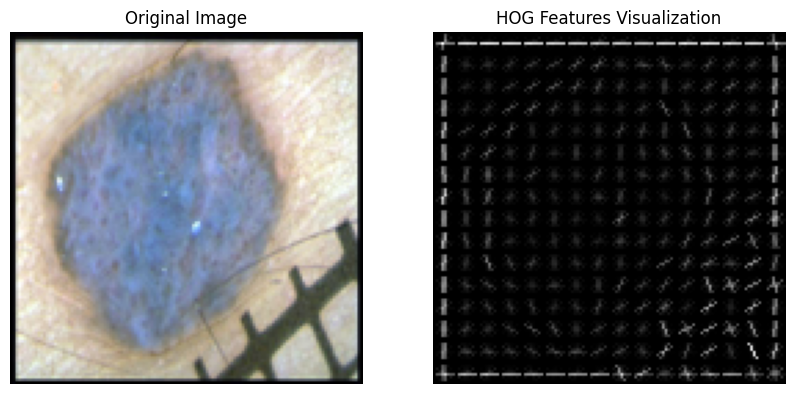

In [ ]:

# Select an index for a sample image (e.g., the first image in the training set)
sample_index = train_idx[0]
sample_image_filename = derm_data.df.loc[sample_index, 'derm']
sample_image_path = os.path.join(images_dir, sample_image_filename)

    # Load the image
img = Image.open(sample_image_path)
    # Resize the image to the same size used for HOG extraction
img = img.resize((128, 128))

    # Convert to numpy array and normalize
img_array = np.array(img) / 255.0

    # Extract HOG features and visualization
    # The `visualize=True` argument is needed to get the visualization
hog_features, hog_image = hog(img_array, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), visualize=True, channel_axis=2)

    # Display the original image and the HOG visualization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array) # Display original color image
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray') # Display HOG visualization
plt.title("HOG Features Visualization")
plt.axis('off')

plt.show()



**Note:** In this cell, I'm working with a single image array (`img_array`) for visualization purposes. I call the `hog` function directly on this single `img_array` because the `extract_hog_features` function is structured to handle a list of images, not a single image array directly. Calling `hog` directly here allows us to get the features and visualization for just this one sample.

### T1.2 Other Feature Extraction Methods (**with ***ORB*** Oriented FAST and Rotated BRIEF**)

Speeded-Up Robust Features (ORB) is a faster alternative to SIFT,
developed to speed up feature detection and description without
compromising much accuracy. Like SIFT, it is scale and rotation
invariant, but it's optimized for performance.

In [ ]:
import cv2
import numpy as np
from PIL import Image
import os

# Function to extract ORB descriptors from a list of images
def extract_orb_features(images):
    orb = cv2.ORB_create() # You can adjust parameters like nfeatures here
    all_descriptors = []
    for img_array in images:
        # Convert image array to uint8 if it's not already (required by OpenCV)
        if img_array.dtype != np.uint8:
            img_array = (img_array * 255).astype(np.uint8)

        # Convert to grayscale (ORB typically works on grayscale)
        if len(img_array.shape) == 3: # Check if it's a color image
             gray_img = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
        else:
             gray_img = img_array # Already grayscale


        # Detect keypoints and compute descriptors
        keypoints, descriptors = orb.detectAndCompute(gray_img, None)

        if descriptors is not None:
            all_descriptors.append(descriptors)
        else:
            # Handle cases where no descriptors are found (e.g., append an empty array or None)
            # For now, we'll append None and filter them out later if needed
            all_descriptors.append(None)
            print("Warning: No ORB descriptors found for an image.")

    return all_descriptors

In [ ]:
# Apply extract_orb_features to your dataset splits
train_orb_descriptors = extract_orb_features(train_images)
valid_orb_descriptors = extract_orb_features(valid_images)
test_orb_descriptors = extract_orb_features(test_images)

# Print the number of images for which descriptors were extracted in each split
print(f"Number of training images processed for ORB: {len(train_orb_descriptors)}")
print(f"Number of validation images processed for ORB: {len(valid_orb_descriptors)}")
print(f"Number of testing images processed for ORB: {len(test_orb_descriptors)}")


# Note: train_orb_descriptors, valid_orb_descriptors, and test_orb_descriptors
# are lists of arrays, where each array contains the descriptors for a single image.
# The next step will be to aggregate these descriptors (e.g., using Bag of Visual Words)
# to create fixed-size feature vectors for classification.

Number of training images processed for ORB: 413
Number of validation images processed for ORB: 203
Number of testing images processed for ORB: 395


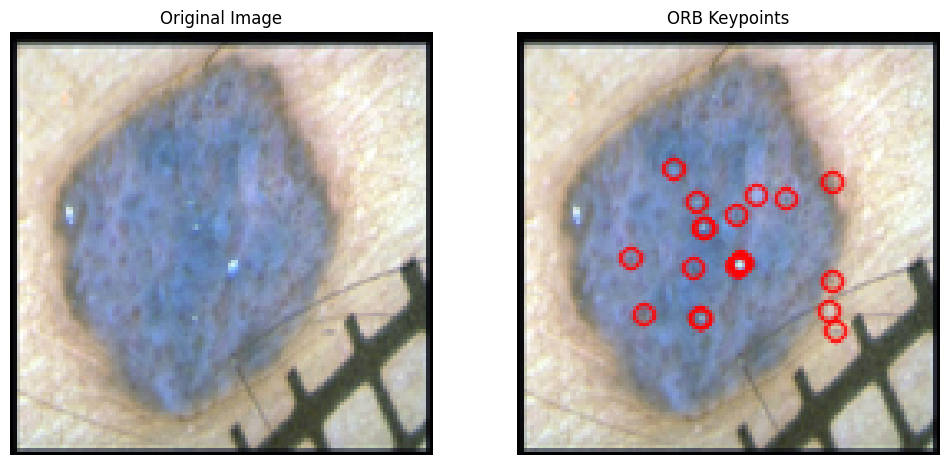

Number of keypoints detected: 20
Shape of descriptors: (20, 32)
Sample descriptors (first 5):
[[157  28 122 105  50 174 233 114  60  66 123 198 217  11 177  97 118  61
   31 172 225 180  21  78 102 239  34 132 125 160  33 145]
 [139  90 247 249 111 253 249 212 175  93 246 231 173 159 247 104 238 153
  255 213 134 148 119 209 214 121 250 139 183 157  37 223]
 [ 49  45 117 101  60  15  76 111  65 162 168  72  19  57  81  48 140 148
   80  41 201 186 193  30 245 204   5  52 101 248  82 168]
 [127  84 112  74  57  61  90 152 193 122 181  72 219  93  29 183 135 208
  221 106 173  39  89 189 243 217  33 190  90 191  74  17]
 [220 109 178 228  21 199  94 216 179 172 138  11  75 251 113  18 248 252
  253 242 104 211 152 170 251 201 133  55  35  55 116  10]]


In [ ]:

# Select an index for a sample image (e.g., the first image in the training set)
sample_index = train_idx[0]
sample_image_filename = derm_data.df.loc[sample_index, 'derm']
sample_image_path = os.path.join(images_dir, sample_image_filename)

try:
    # Load the image
    img = Image.open(sample_image_path)
    # Resize the image to the same size used for ORB extraction
    img = img.resize((128, 128))

    # Convert image to numpy array and to uint8 (required by OpenCV)
    img_array = np.array(img)
    if img_array.dtype != np.uint8:
        img_array = (img_array * 255).astype(np.uint8)

    # Convert to grayscale (ORB typically works on grayscale)
    if len(img_array.shape) == 3: # Check if it's a color image
         gray_img = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
    else:
         gray_img = img_array # Already grayscale

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = orb.detectAndCompute(gray_img, None)

    # Draw keypoints on the original color image (if available) or grayscale
    img_with_keypoints = cv2.drawKeypoints(img_array if len(img_array.shape) == 3 else gray_img, keypoints, None, color=(255, 0, 0), flags=0)


    # Display the original image and the image with keypoints
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img_array if len(img_array.shape) == 3 else gray_img, cmap='gray' if len(img_array.shape) == 2 else None)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_with_keypoints, cmap='gray' if len(img_array.shape) == 2 and len(img_with_keypoints.shape) == 2 else None)
    plt.title("ORB Keypoints")
    plt.axis('off')

    plt.show()

    # Print information about the descriptors
    print(f"Number of keypoints detected: {len(keypoints)}")
    if descriptors is not None:
        print(f"Shape of descriptors: {descriptors.shape}")
        print(f"Sample descriptors (first 5):")
        print(descriptors[:5])
    else:
        print("No descriptors found for this sample image.")


except FileNotFoundError:
    print(f"Error: The file was not found at {sample_image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

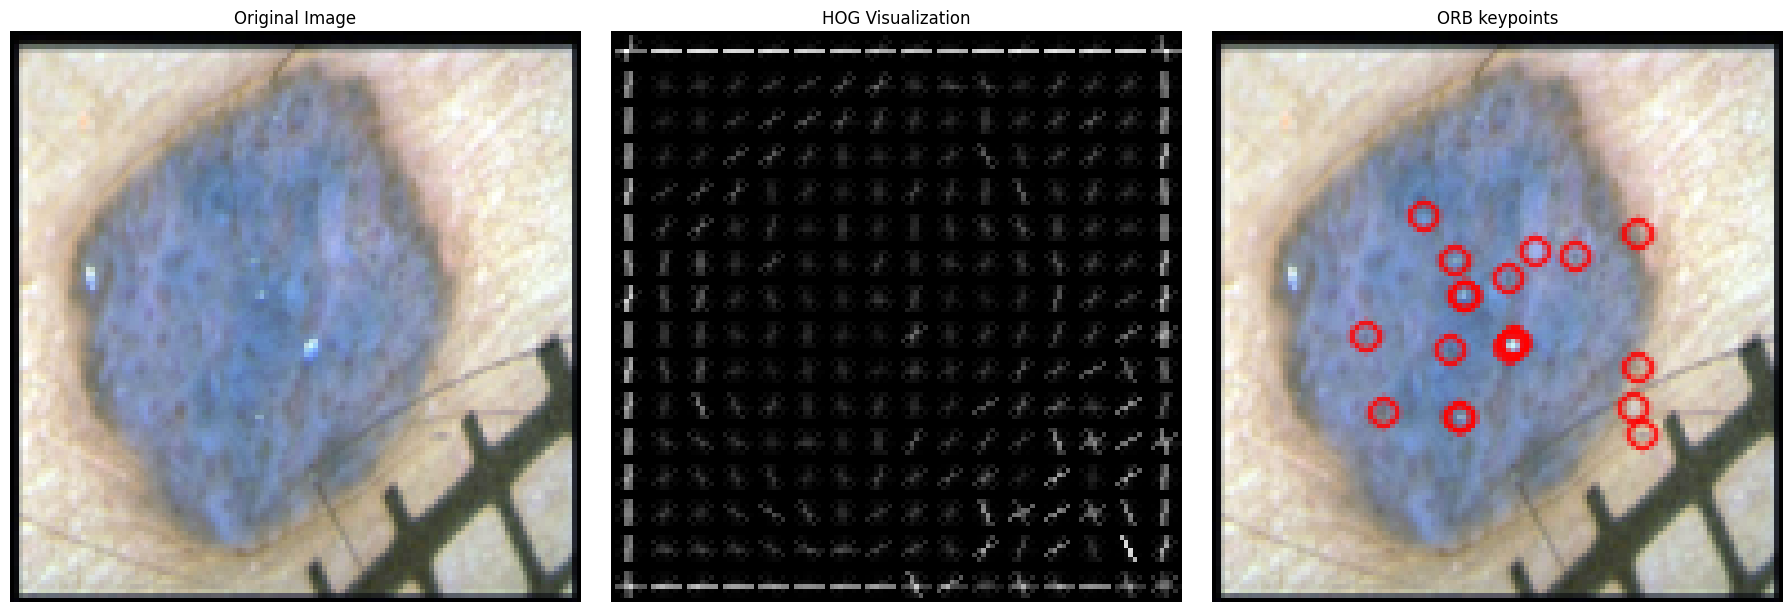

In [ ]:
def show_images(images, titles):
    assert len(images) == len(titles) and len(images) >= 1
    n = len(images)
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(6*n, 6), constrained_layout=True)

    # axes is a single Axes when n==1; normalize to a list
    if n == 1:
        axes = [axes]

    for ax, img, title in zip(axes, images, titles):
        # grayscale vs color
        if getattr(img, "ndim", 2) == 3:
            ax.imshow(img)
        else:
            ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.show()

show_images(
    images=[img_array, hog_image, img_with_keypoints],
    titles=["Original Image", "HOG Visualization", "ORB keypoints"]
)


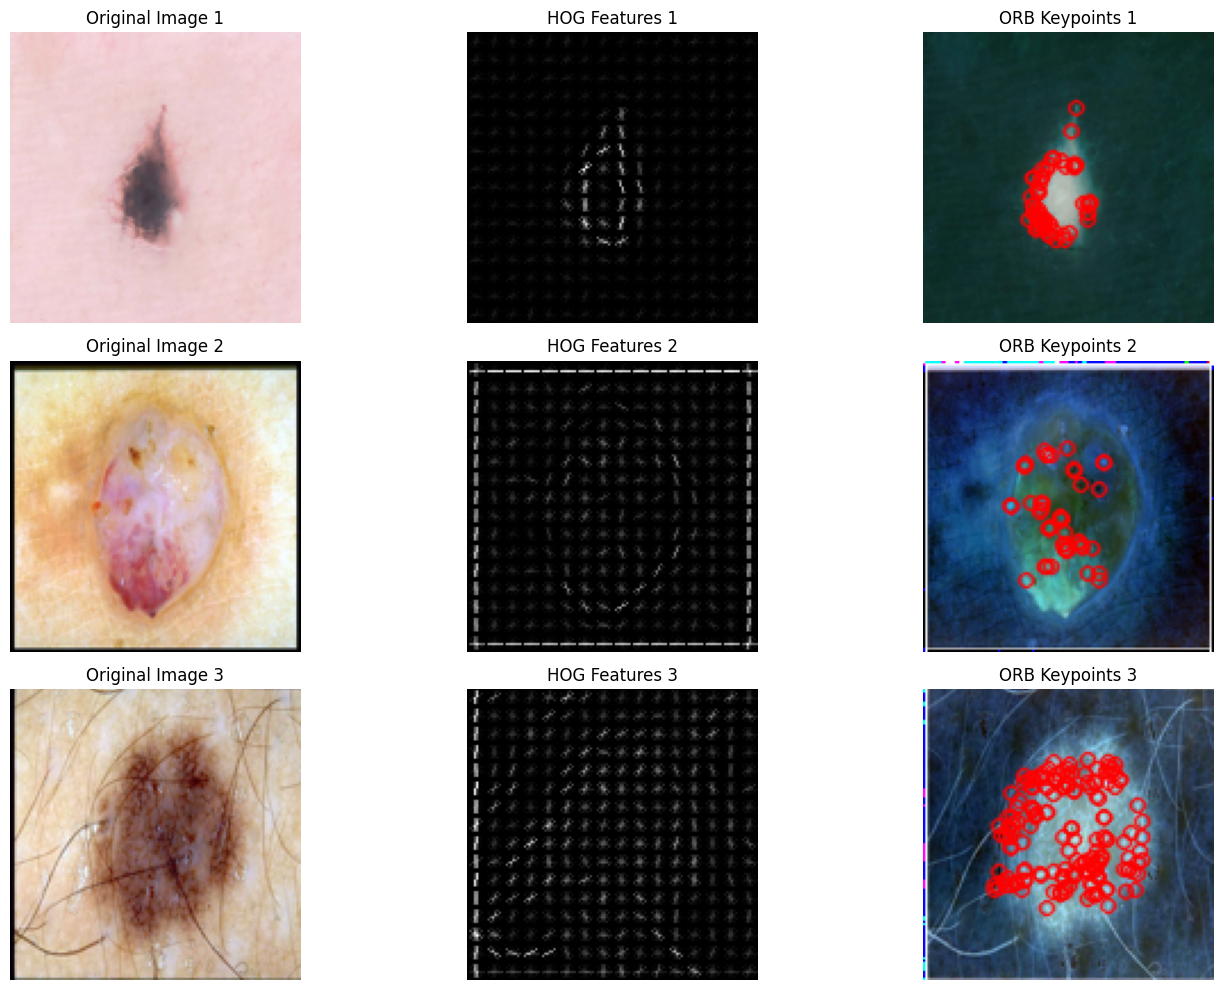

In [ ]:
import random

# Select three random indices from the test set to visualize
selected_indices = random.sample(test_idx, 3)

plt.figure(figsize=(15, 10))

for i, index in enumerate(selected_indices):
    image_filename = derm_data.df.loc[index, 'derm']
    image_path = os.path.join(images_dir, image_filename)

    try:
        # Load the image
        img = Image.open(image_path)
        img = img.resize((128, 128)) # Resize to match the size used for feature extraction

        # Convert image to numpy array and normalize/convert for HOG and ORB
        img_array = np.array(img)
        img_array_hog = img_array / 255.0
        img_array_orb = (img_array * 255).astype(np.uint8)

        # Convert to grayscale for ORB
        if len(img_array_orb.shape) == 3:
            gray_img_orb = cv2.cvtColor(img_array_orb, cv2.COLOR_RGB2GRAY)
        else:
            gray_img_orb = img_array_orb

        # HOG Feature Extraction and Visualization ---
        # The `visualize=True` argument is needed to get the visualization
        hog_features, hog_image = hog(img_array_hog, orientations=9, pixels_per_cell=(8, 8),
                                     cells_per_block=(2, 2), visualize=True, channel_axis=2)

        # --- ORB Feature Extraction and Visualization ---
        orb = cv2.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(gray_img_orb, None)
        # Draw keypoints on the original color image (if available) or grayscale
        img_with_keypoints = cv2.drawKeypoints(img_array_orb if len(img_array_orb.shape) == 3 else gray_img_orb, keypoints, None, color=(255, 0, 0), flags=0)


        # --- Display the images and features ---
        plt.subplot(3, 3, i * 3 + 1)
        plt.imshow(img_array)
        plt.title(f"Original Image {i+1}")
        plt.axis('off')

        plt.subplot(3, 3, i * 3 + 2)
        plt.imshow(hog_image, cmap='gray')
        plt.title(f"HOG Features {i+1}")
        plt.axis('off')

        plt.subplot(3, 3, i * 3 + 3)
        plt.imshow(img_with_keypoints, cmap='gray' if len(img_array_orb.shape) == 2 and len(img_with_keypoints.shape) == 2 else None)
        plt.title(f"ORB Keypoints {i+1}")
        plt.axis('off')

    except FileNotFoundError:
        print(f"Image file not found for index {index}: {image_path}")
        continue
    except Exception as e:
        print(f"Error processing image for index {index}: {e}")
        continue


plt.tight_layout()
plt.show()

### T1.3 - T1.5 Classifiers (ANN, SVM, KNN)
Train and evaluate the classifiers using the
extracted features.

### 1. ANN Classification

1. Defining the model architecture (layers, activation functions, output layer).
2. Compiling the model (specifying optimizer, loss function, metrics).
3. Training the model using the training data and validating with the validation data.
4. Evaluating the model on the test data.

####  **build the ANN model(HOG)**

In [ ]:
# Import required modules
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Experiment 1  

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 128)            │     1,036,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,046,484 (3.99 MB)

 Trainable params: 1,046,484 (3.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.4616 - loss: 2.3092 - val_accuracy: 0.4975 - val_loss: 1.7498
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5933 - loss: 1.5349 - val_accuracy: 0.4975 - val_loss: 1.4324
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6222 - loss: 1.2498 - val_accuracy: 0.5025 - val_loss: 1.4626
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6237 - loss: 1.1786 - val_accuracy: 0.5517 - val_loss: 1.3962
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6712 - loss: 1.0877 - val_accuracy: 0.5074 - val_loss: 1.4568
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6618 - loss: 1.0196 - val_accuracy: 0.5123 - val_loss: 1.4273
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6819 - loss: 0.9281 - val_accuracy: 0.5517 - val_loss: 1.3140
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7460 - loss: 0.8443 - val_accuracy: 0.5616 - va

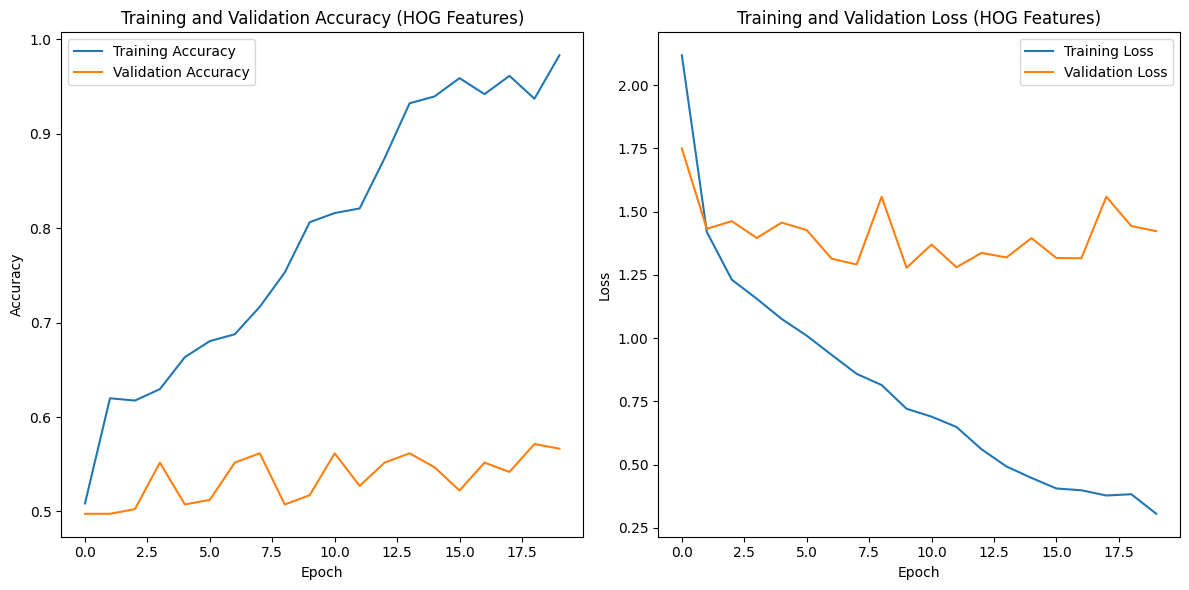

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report (HOG Features):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.58      0.89      0.70       219
           2       0.41      0.22      0.28       101
           3       0.17      0.03      0.04        40
           4       0.00      0.00      0.00        19

    accuracy                           0.55       395
   macro avg       0.23      0.23      0.21       395
weighted avg       0.44      0.55      0.47       395



In [ ]:
# 1st experment : Hidden Layers: [128, 64], Epochs: 20 , Learning Rate = 0.001,
# Define the number of input features (size of HOG feature vector)
input_shape = x_train_hog.shape[1]

# Define the number of output classes (number of unique diagnoses)
num_classes = len(derm_data.df['diagnosis'].unique()) # Ensure num_classes is defined if not already

# Build the ANN model
ann_model_hog_1 = Sequential([
    Input(shape=(input_shape,)),  # Input layer matching the HOG feature size
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)), # 2nd hidden layer with 128 units and ReLU activation
    Dense(64, activation='relu'),  # 3rd hidden layer with 64 units and ReLU activation
    Dense(num_classes, activation='softmax') # Output layer with softmax for multi-class classification
])


# Print the model summary
ann_model_hog_1.summary()



# Compile the model
ann_model_hog_1.compile(optimizer='adam', # Using Adam optimizer
              loss='categorical_crossentropy', # Suitable for multi-class classification with one-hot labels
              metrics=['accuracy']) # Monitor accuracy

# Train the model
epochs = 20
batch_size = 32

history_hog_1 = ann_model_hog_1.fit(x_train_hog, y_train_one_hot,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_valid_hog, y_valid_one_hot))

print("\nModel training complete.")


# Evaluate the model on the HOG features of the test data
test_loss, test_acc = ann_model_hog_1.evaluate(x_test_hog, y_test_one_hot, verbose=2)


# Predict the classes for the test data
y_pred_classes = ann_model_hog_1.predict(x_test_hog)
y_test_labels = np.argmax(y_test_one_hot, axis=1)
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_hog_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_hog_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (HOG Features)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_hog_1.history['loss'], label='Training Loss')
plt.plot(history_hog_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (HOG Features)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Convert one-hot encoded true labels back to single label format
y_test_labels_hog_1 = np.argmax(y_test_one_hot, axis=1)

# Convert predicted probabilities to class labels for the HOG model
# Make sure y_pred_classes is from the HOG model prediction on the test set
y_pred_labels_hog_1 = np.argmax(ann_model_hog_1.predict(x_test_hog), axis=1)


# Display a classification report for the HOG model
class_report_hog_1 = classification_report(y_test_labels_hog_1, y_pred_labels_hog_1, zero_division=0)
print("Classification Report (HOG Features):\n", class_report_hog_1)



# Experiment 2

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_61 (Dense)                │ (None, 256)            │     2,073,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,308 (8.07 MB)

 Trainable params: 2,116,308 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 299ms/step - accuracy: 0.4253 - loss: 2.5666 - val_accuracy: 0.4926 - val_loss: 2.7793
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4851 - loss: 2.0413 - val_accuracy: 0.4926 - val_loss: 1.8632
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6008 - loss: 1.5655 - val_accuracy: 0.4926 - val_loss: 1.7288
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6448 - loss: 1.4620 - val_accuracy: 0.4975 - val_loss: 1.6161
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6333 - loss: 1.3686 - val_accuracy: 0.5074 - val_loss: 1.5661
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6737 - loss: 1.1756 - val_accuracy: 0.4975 - val_loss: 1.5323
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6185 - loss: 1.2007 - val_accuracy: 0.5665 - val_loss: 1.4560
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6503 - loss: 1.1328 - val_accuracy: 0.5074 - val_los

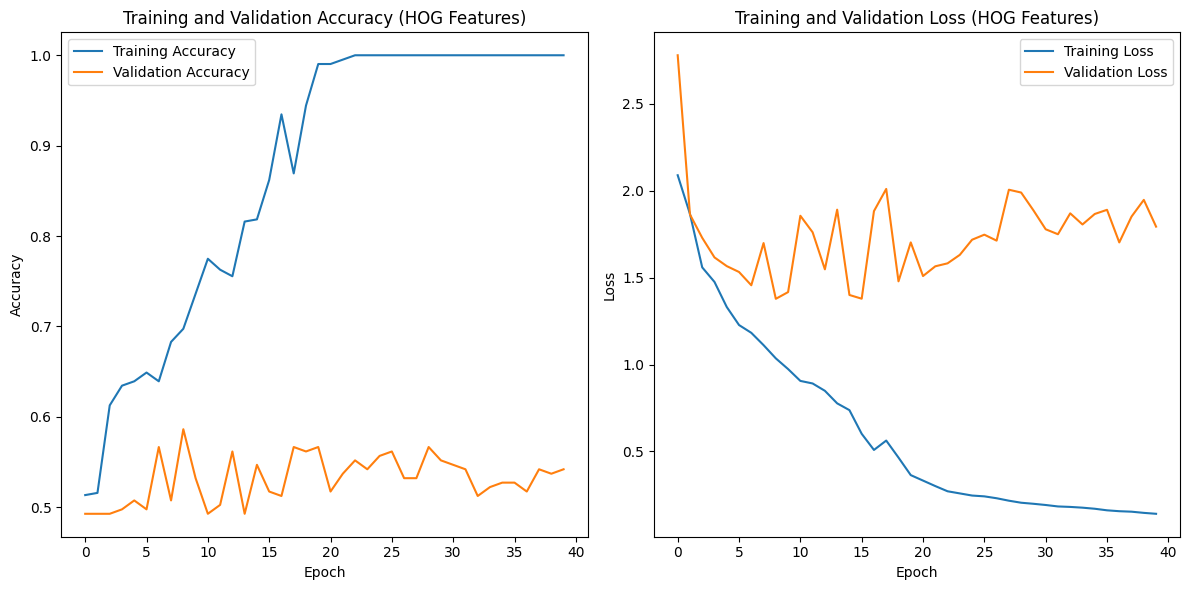

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report (HOG Features):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.60      0.80      0.69       219
           2       0.39      0.35      0.37       101
           3       0.12      0.03      0.04        40
           4       0.00      0.00      0.00        19

    accuracy                           0.54       395
   macro avg       0.22      0.24      0.22       395
weighted avg       0.45      0.54      0.48       395



In [ ]:
# 2nd experment : Hidden Layers: [256, 128, 64] , Epochs: 40,  Learning Rate = 0.001

# Define the number of input features (size of HOG feature vector)
input_shape = x_train_hog.shape[1]

# Define the number of output classes (number of unique diagnoses)
num_classes = len(derm_data.df['diagnosis'].unique()) # Ensure num_classes is defined if not already


# Build the ANN model
ann_model_hog_2 = Sequential([
    Input(shape=(input_shape,)),  # Input layer matching the HOG feature size
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)), # 2nd hidden layer with 128 units and ReLU activation
    Dense(64, activation='relu'),  # 3rd hidden layer with 64 units and ReLU activation
    Dense(num_classes, activation='softmax') # Output layer with softmax for multi-class classification
])


# Print the model summary
ann_model_hog_2.summary()



# Compile the model
ann_model_hog_2.compile(optimizer='adam', # Using Adam optimizer
              loss='categorical_crossentropy', # Suitable for multi-class classification with one-hot labels
              metrics=['accuracy']) # Monitor accuracy

# Train the model
epochs = 40
batch_size = 32

history_hog_2 = ann_model_hog_2.fit(x_train_hog, y_train_one_hot,
                    epochs=epochs,
                    batch_size=batch_size,
                  validation_data=(x_valid_hog, y_valid_one_hot))

print("\nModel training complete.")


# Evaluate the model on the HOG features of the test data
test_loss, test_acc = ann_model_hog_2.evaluate(x_test_hog, y_test_one_hot, verbose=2)


# Predict the classes for the test data
y_pred_classes_2 = ann_model_hog_2.predict(x_test_hog)
y_test_label_2 = np.argmax(y_test_one_hot, axis=1)
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_hog_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_hog_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (HOG Features)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_hog_2.history['loss'], label='Training Loss')
plt.plot(history_hog_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (HOG Features)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Convert one-hot encoded true labels back to single label format
y_test_labels_hog_2 = np.argmax(y_test_one_hot, axis=1)

# Convert predicted probabilities to class labels for the HOG model
# Make sure y_pred_classes is from the HOG model prediction on the test set
y_pred_labels_hog_2 = np.argmax(ann_model_hog_2.predict(x_test_hog), axis=1)


# Display a classification report for the HOG model
class_report_hog_2 = classification_report(y_test_labels_hog_2, y_pred_labels_hog_2, zero_division=0)
print("Classification Report (HOG Features):\n", class_report_hog_2)



# Experiment 3 with dropout


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 256)            │     2,073,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,308 (8.07 MB)

 Trainable params: 2,116,308 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 315ms/step - accuracy: 0.4117 - loss: 2.5373 - val_accuracy: 0.4926 - val_loss: 1.7593
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5214 - loss: 1.7601 - val_accuracy: 0.4926 - val_loss: 1.7145
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5182 - loss: 1.6846 - val_accuracy: 0.4926 - val_loss: 1.6348
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6197 - loss: 1.4435 - val_accuracy: 0.4926 - val_loss: 1.4851
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5705 - loss: 1.4209 - val_accuracy: 0.4926 - val_loss: 1.4872
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5904 - loss: 1.4499 - val_accuracy: 0.4926 - val_loss: 1.4341
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6144 - loss: 1.3036 - val_accuracy: 0.4926 - val_loss: 1.4196
Epoch 8/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6401 - loss: 1.1992 - val_accuracy: 0.4926 - val_los

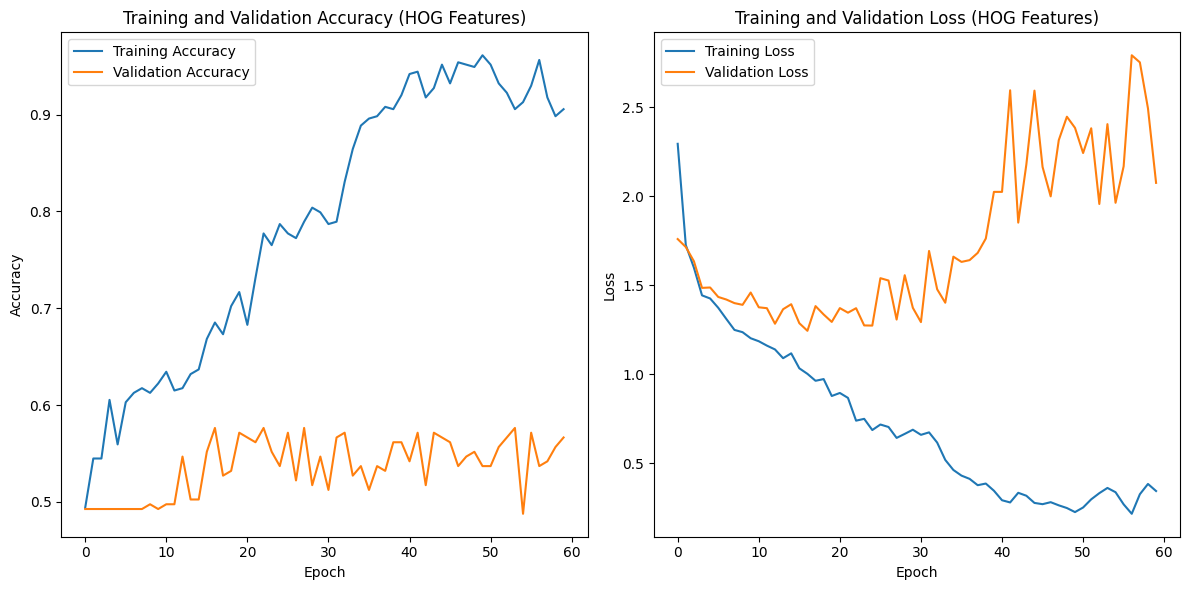

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report (HOG Features):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.60      0.87      0.71       219
           2       0.43      0.29      0.34       101
           3       0.30      0.07      0.12        40
           4       0.00      0.00      0.00        19

    accuracy                           0.56       395
   macro avg       0.27      0.25      0.23       395
weighted avg       0.47      0.56      0.49       395



In [ ]:
# 3rd experment :Hidden Layers: [256, 128, 64] + Dropout(0.3), Epochs: 60, Learning Rate = 0.0005.
# Define the number of input features (size of HOG feature vector)
input_shape = x_train_hog.shape[1]

# Define the number of output classes (number of unique diagnoses)
num_classes = len(derm_data.df['diagnosis'].unique()) # Ensure num_classes is defined if not already

# current experment:  Hidden Layers: [256, 128, 64]+ Dropout(0.5, 0.3), Epochs: 50 , Learning Rate = 0.001 ;;;accuracy: 0.5772 - loss: 1.5065. best one


# Build the ANN model
ann_model_hog_3 = Sequential([
    Input(shape=(input_shape,)),  # Input layer matching the HOG feature size
    Dense(256, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0005)), # 2nd hidden layer with 128 units and ReLU activation
    Dropout(0.3),
    Dense(64, activation='relu'),  # 3rd hidden layer with 64 units and ReLU activation
    Dense(num_classes, activation='softmax') # Output layer with softmax for multi-class classification
])


# Print the model summary
ann_model_hog_3.summary()



# Compile the model
ann_model_hog_3.compile(optimizer='adam', # Using Adam optimizer
              loss='categorical_crossentropy', # Suitable for multi-class classification with one-hot labels
              metrics=['accuracy']) # Monitor accuracy

# Train the model
epochs = 60
batch_size = 32

history_hog_3 = ann_model_hog_3.fit(x_train_hog, y_train_one_hot,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_valid_hog, y_valid_one_hot))

print("\nModel training complete.")


# Evaluate the model on the HOG features of the test data
test_loss, test_acc = ann_model_hog_3.evaluate(x_test_hog, y_test_one_hot, verbose=2)


# Predict the classes for the test data
y_pred_classes_3 = ann_model_hog_3.predict(x_test_hog)
y_test_labels_3 = np.argmax(y_test_one_hot, axis=1)
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_hog_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_hog_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (HOG Features)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_hog_3.history['loss'], label='Training Loss')
plt.plot(history_hog_3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (HOG Features)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Convert one-hot encoded true labels back to single label format
y_test_labels_hog_3 = np.argmax(y_test_one_hot, axis=1)

# Convert predicted probabilities to class labels for the HOG model
y_pred_labels_hog_3 = np.argmax(ann_model_hog_3.predict(x_test_hog), axis=1)


# Display a classification report for the HOG model
class_report_hog = classification_report(y_test_labels_hog_3, y_pred_labels_hog_3, zero_division=0)
print("Classification Report (HOG Features):\n", class_report_hog)



# Experiment 4 with dropout

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (None, 256)            │     2,073,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,308 (8.07 MB)

 Trainable params: 2,116,308 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step - accuracy: 0.4268 - loss: 2.7307 - val_accuracy: 0.4926 - val_loss: 2.0753
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5641 - loss: 2.1298 - val_accuracy: 0.4926 - val_loss: 1.8935
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6207 - loss: 1.7689 - val_accuracy: 0.4926 - val_loss: 1.7886
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5649 - loss: 1.7311 - val_accuracy: 0.4926 - val_loss: 1.7497
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6092 - loss: 1.6006 - val_accuracy: 0.4926 - val_loss: 1.6916
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6045 - loss: 1.4838 - val_accuracy: 0.4926 - val_loss: 1.6711
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6080 - loss: 1.5310 - val_accuracy: 0.4926 - val_loss: 1.6650
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5619 - loss: 1.5634 - val_accuracy: 0.4926 - val_los

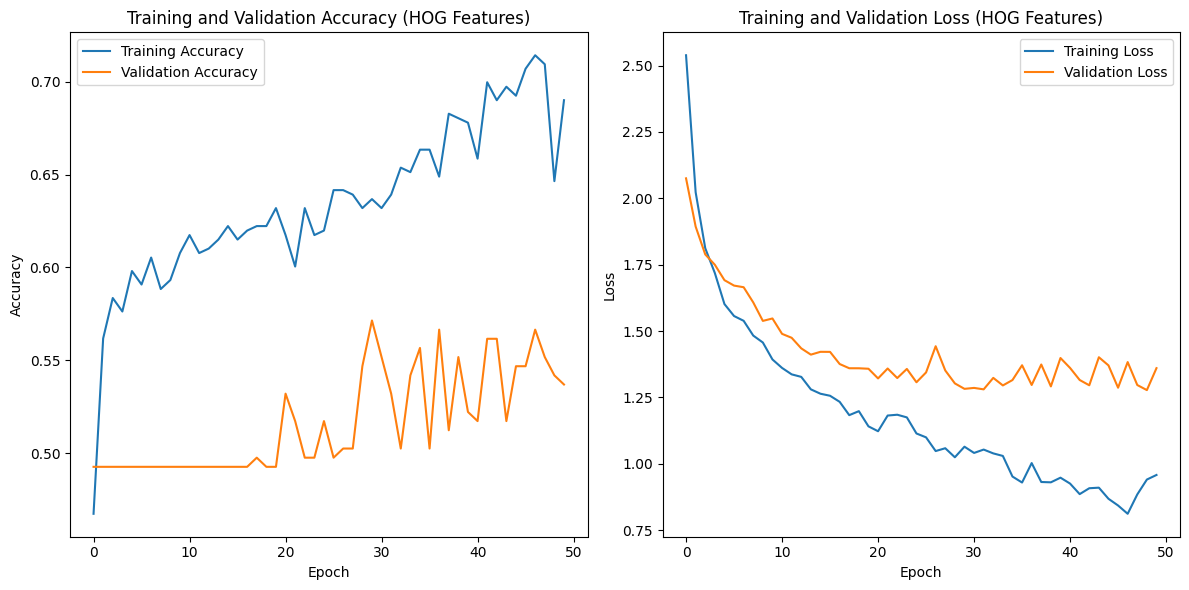

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report (HOG Features):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.58      0.99      0.73       219
           2       0.56      0.10      0.17       101
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        19

    accuracy                           0.57       395
   macro avg       0.23      0.22      0.18       395
weighted avg       0.46      0.57      0.45       395



In [ ]:
# current experment:  Hidden Layers: [256, 128, 64]+ Dropout(0.5, 0.3), Epochs: 50 , Learning Rate = 0.001 ;;;accuracy: 0.5772 - loss: 1.5065. best one

# Define the number of input features (size of HOG feature vector)
input_shape = x_train_hog.shape[1]

# Define the number of output classes (number of unique diagnoses)
num_classes = len(derm_data.df['diagnosis'].unique()) # Ensure num_classes is defined if not already

# Build the ANN model
ann_model_hog = Sequential([
    Input(shape=(input_shape,)),  # Input layer matching the HOG feature size
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)), # 2nd hidden layer with 128 units and ReLU activation
    Dropout(0.3),
    Dense(64, activation='relu'),  # 3rd hidden layer with 64 units and ReLU activation
    Dense(num_classes, activation='softmax') # Output layer with softmax for multi-class classification
])


# Print the model summary
ann_model_hog.summary()



# Compile the model
ann_model_hog.compile(optimizer='adam', # Using Adam optimizer
              loss='categorical_crossentropy', # Suitable for multi-class classification with one-hot labels
              metrics=['accuracy']) # Monitor accuracy

# Train the model
epochs = 50
batch_size = 32

history_hog = ann_model_hog.fit(x_train_hog, y_train_one_hot,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_valid_hog, y_valid_one_hot))

print("\nModel training complete.")


# Evaluate the model on the HOG features of the test data
test_loss, test_acc = ann_model_hog.evaluate(x_test_hog, y_test_one_hot, verbose=2)


# Predict the classes for the test data
y_pred_classes = ann_model_hog.predict(x_test_hog)
y_test_labels = np.argmax(y_test_one_hot, axis=1)
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_hog.history['accuracy'], label='Training Accuracy')
plt.plot(history_hog.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (HOG Features)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_hog.history['loss'], label='Training Loss')
plt.plot(history_hog.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (HOG Features)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Convert one-hot encoded true labels back to single label format
y_test_labels_hog = np.argmax(y_test_one_hot, axis=1)

# Convert predicted probabilities to class labels for the HOG model
y_pred_labels_hog = np.argmax(ann_model_hog.predict(x_test_hog), axis=1)


# Display a classification report for the HOG model
class_report_hog = classification_report(y_test_labels_hog, y_pred_labels_hog, zero_division=0)
print("Classification Report (HOG Features):\n", class_report_hog)



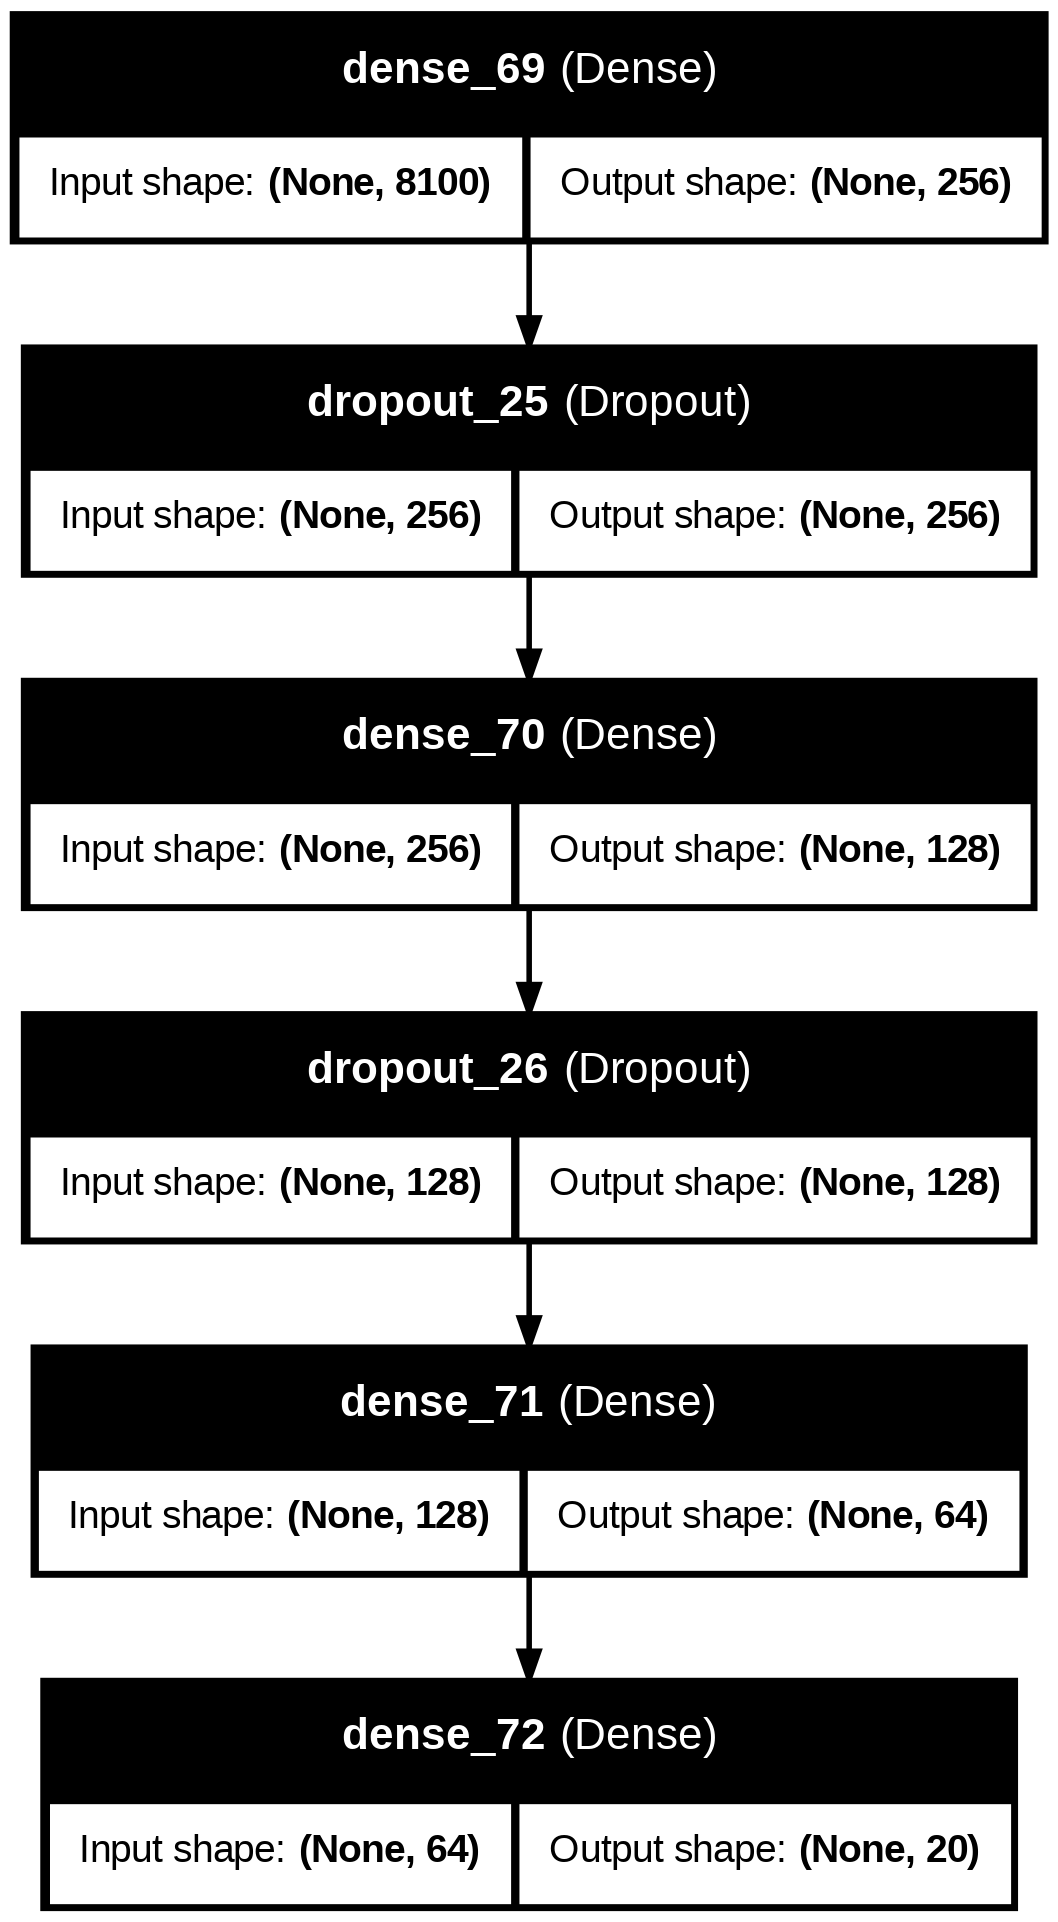

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras.utils import plot_model
# Visualize the model architecture and save to file
plot_model(ann_model_hog, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the image in the notebook
Image(filename='model.png')

#### **build ANN model (ORB)**

1. Prepare ORB Features
2. Build Classifier
3. Compile and Train


> 1. Prepare ORB Features

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Collect all descriptors from the training set
# Filter out None values (images with no descriptors)
all_train_descriptors = [desc for desc in train_orb_descriptors if desc is not None]

# Concatenate all descriptors into a single NumPy array
if all_train_descriptors:
    all_train_descriptors = np.vstack(all_train_descriptors)
    print(f"Shape of all concatenated training descriptors: {all_train_descriptors.shape}")
else:
    print("No training descriptors found to build the vocabulary.")
    all_train_descriptors = np.array([]) # Create an empty array to avoid errors


# Step 2: Cluster the descriptors to create a visual vocabulary (Bag of Visual Words)
# Define the number of visual words (clusters)
k = 100

if all_train_descriptors.shape[0] > 0:
    print(f"Clustering descriptors into {k} visual words...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for KMeans
    kmeans.fit(all_train_descriptors)
    visual_vocabulary = kmeans.cluster_centers_
    print("Visual vocabulary created.")
    print(f"Shape of visual vocabulary: {visual_vocabulary.shape}")
else:
    visual_vocabulary = np.array([]) # Create an empty vocabulary if no descriptors


# Step 3: Create histograms for each image (Bag of Visual Words representation)
def create_bovw_histograms(descriptor_list, vocabulary, num_clusters):
    histograms = []
    for descriptors in descriptor_list:
        if descriptors is not None and vocabulary.shape[0] > 0:
            # Find the nearest cluster center for each descriptor
            # Use cdist for efficient distance calculation
            from scipy.spatial.distance import cdist
            distances = cdist(descriptors, vocabulary)
            nearest_cluster_indices = np.argmin(distances, axis=1)

            # Create a histogram of cluster assignments
            histogram = np.zeros(num_clusters)
            for index in nearest_cluster_indices:
                histogram[index] += 1

            # Normalize the histogram (optional but often helpful)
            # histogram = histogram / np.sum(histogram) # Uncomment to normalize

            histograms.append(histogram)
        else:
            # Append a zero histogram for images with no descriptors or if vocabulary is empty
            histograms.append(np.zeros(num_clusters))

    return np.array(histograms)

# Create BoVW histograms for each dataset split
if visual_vocabulary.shape[0] > 0:
    x_train_orb_bovw = create_bovw_histograms(train_orb_descriptors, visual_vocabulary, k)
    x_valid_orb_bovw = create_bovw_histograms(valid_orb_descriptors, visual_vocabulary, k)
    x_test_orb_bovw = create_bovw_histograms(test_orb_descriptors, visual_vocabulary, k)

    print("\nBag of Visual Words feature vectors created.")
    print(f"Shape of training BoVW features: {x_train_orb_bovw.shape}")
    print(f"Shape of validation BoVW features: {x_valid_orb_bovw.shape}")
    print(f"Shape of testing BoVW features: {x_test_orb_bovw.shape}")
else:
    print("\nCould not create BoVW feature vectors as no visual vocabulary was built.")
    x_train_orb_bovw = np.array([])
    x_valid_orb_bovw = np.array([])
    x_test_orb_bovw = np.array([])

Shape of all concatenated training descriptors: (29884, 32)
Clustering descriptors into 100 visual words...
Visual vocabulary created.
Shape of visual vocabulary: (100, 32)

Bag of Visual Words feature vectors created.
Shape of training BoVW features: (413, 100)
Shape of validation BoVW features: (203, 100)
Shape of testing BoVW features: (395, 100)


> 2. build ANN classifier

# Experiment 1  with dropout

In [ ]:

 #1st experment :Hidden Layers: [256, 128, 64] + Dropout(0.5, 0.5, 0.3), Epochs: 40, Learning Rate = 0.001.

# Define the number of input features (size of ORB feature vector)
input_shape = x_train_orb_bovw.shape[1]

# Define the number of output classes (number of unique diagnoses)
num_classes = len(derm_data.df['diagnosis'].unique()) # Ensure num_classes is defined if not already

# Build the ANN model
orb_model_1 = Sequential([
    Input(shape=(input_shape,)),  # Input layer matching the HOG feature size
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)), # 2nd hidden layer with 128 units and ReLU activation
    Dropout(0.3),
    Dense(64, activation='relu'),  # 3rd hidden layer with 64 units and ReLU activation
    Dropout(0.3),
    Dense(num_classes, activation='softmax') # Output layer with softmax for multi-class classification
])
# Print the model summary
orb_model_1.summary()

# Compile the model
orb_model_1.compile(optimizer='adam', # Using Adam optimizer
              loss='categorical_crossentropy', # Suitable for multi-class classification with one-hot labels
              metrics=['accuracy']) # Monitor accuracy

# Train the model
epochs = 40
batch_size = 32

history_orb_1 = orb_model_1.fit(x_train_orb_bovw, y_train_one_hot,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_valid_orb_bovw, y_valid_one_hot))

print("\nModel training complete.")

# Evaluate the model on the ORB features of the test data
test_loss, test_acc = orb_model_1.evaluate(x_test_orb_bovw, y_test_one_hot, verbose=2)

# Print test accuracy
print(f"Test Accuracy using ORB features: {test_acc:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_orb_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_orb_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (ORB Features)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_orb_1.history['loss'], label='Training Loss')
plt.plot(history_orb_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (ORB Features)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Convert one-hot encoded true labels back to single label format
y_test_labels_orb_1 = np.argmax(y_test_one_hot, axis=1)

# Convert predicted probabilities to class labels for the HOG model
y_pred_labels_orb_1 = np.argmax(orb_model_1.predict(x_test_orb_bovw), axis=1)


# Display a classification report for the HOG model
class_report_orb_1 = classification_report(y_test_labels_orb_1, y_pred_labels_orb_1, zero_division=0)
print("Classification Report (HOG Features):\n", class_report_orb_1)

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_73 (Dense)                │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,308 (266.83 KB)

 Trainable params: 68,308 (266.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 326ms/step - accuracy: 0.2339 - loss: 3.1702 - val_accuracy: 0.4926 - val_loss: 2.3057
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5799 - loss: 2.1487 - val_accuracy: 0.5222 - val_loss: 1.9680
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6013 - loss: 1.7405 - val_accuracy: 0.4975 - val_loss: 1.8695
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5942 - loss: 1.7227 - val_accuracy: 0.5025 - val_loss: 1.7784
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6418 - loss: 1.5630 - val_accuracy: 0.5320 - val_loss: 1.6933
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6334 - loss: 1.5131 - val_accuracy: 0.5271 - val_loss: 1.6626
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5808 - loss: 1.5126 - val_accuracy: 0.5320 - val_loss: 1.6529
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5918 - loss: 1.5291 - val_accuracy: 0.5369 - val_los

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Classification Report (HOG Features):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.62      0.86      0.72       219
           2       0.46      0.38      0.42       101
           3       0.57      0.10      0.17        40
           4       0.00      0.00      0.00        19

    accuracy                           0.58       395
   macro avg       0.33      0.27      0.26       395
weighted avg       0.52      0.58      0.52       395



# Experiment 2

In [ ]:
# 2nd experment : Hidden Layers: [128, 64], Epochs: 90 , Learning Rate = 0.001,

# Define the number of input features (size of ORB feature vector)
input_shape = x_train_orb_bovw.shape[1]

# Define the number of output classes (number of unique diagnoses)
num_classes = len(derm_data.df['diagnosis'].unique()) # Ensure num_classes is defined if not already


# Build the ANN model
orb_model_2 = Sequential([
    Input(shape=(input_shape,)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)), # 2nd hidden layer with 128 units and ReLU activation
    Dense(64, activation='relu'),  # 3rd hidden layer with 64 units and ReLU activation
    Dense(num_classes, activation='softmax') # Output layer with softmax for multi-class classification
])


# Print the model summary
orb_model_2.summary()

# Compile the model
orb_model_2.compile(optimizer='adam', # Using Adam optimizer
              loss='categorical_crossentropy', # Suitable for multi-class classification with one-hot labels
              metrics=['accuracy']) # Monitor accuracy

# Train the model
epochs = 90
batch_size = 32

history_orb_2 = orb_model_2.fit(x_train_orb_bovw, y_train_one_hot,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_valid_orb_bovw, y_valid_one_hot))

print("\nModel training complete.")

# Evaluate the model on the ORB features of the test data
test_loss, test_acc = orb_model_2.evaluate(x_test_orb_bovw, y_test_one_hot, verbose=2)

# Print test accuracy
print(f"Test Accuracy using ORB features: {test_acc:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_orb_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_orb_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (ORB Features)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_orb_2.history['loss'], label='Training Loss')
plt.plot(history_orb_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (ORB Features)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Convert one-hot encoded true labels back to single label format
y_test_labels_orb_2 = np.argmax(y_test_one_hot, axis=1)

# Convert predicted probabilities to class labels for the HOG model
# Make sure y_pred_classes is from the HOG model prediction on the test set
y_pred_labels_orb_2 = np.argmax(orb_model_2.predict(x_test_orb_bovw), axis=1)


# Display a classification report for the HOG model
class_report_orb_2 = classification_report(y_test_labels_orb_2, y_pred_labels_orb_2, zero_division=0)
print("Classification Report (HOG Features):\n", class_report_orb_2)

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_77 (Dense)                │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,484 (87.83 KB)

 Trainable params: 22,484 (87.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.2297 - loss: 3.1659 - val_accuracy: 0.4926 - val_loss: 2.3241
Epoch 2/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6109 - loss: 1.6933 - val_accuracy: 0.5320 - val_loss: 1.8099
Epoch 3/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6721 - loss: 1.3702 - val_accuracy: 0.5222 - val_loss: 1.7129
Epoch 4/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6095 - loss: 1.2858 - val_accuracy: 0.5320 - val_loss: 1.5876
Epoch 5/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6810 - loss: 1.0910 - val_accuracy: 0.5369 - val_loss: 1.5446
Epoch 6/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 1.0183 - val_accuracy: 0.5369 - val_loss: 1.5305
Epoch 7/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7466 - loss: 0.8707 - val_accuracy: 0.5271 - val_loss: 1.4945
Epoch 8/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7697 - loss: 0.8046 - val_accuracy: 0.5320 - val_los

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Classification Report (HOG Features):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.61      0.74      0.67       219
           2       0.43      0.36      0.39       101
           3       0.18      0.12      0.15        40
           4       0.25      0.11      0.15        19

    accuracy                           0.52       395
   macro avg       0.29      0.27      0.27       395
weighted avg       0.48      0.52      0.49       395



# Experiment 3

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,308 (266.83 KB)

 Trainable params: 68,308 (266.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 288ms/step - accuracy: 0.3626 - loss: 2.7459 - val_accuracy: 0.5271 - val_loss: 2.0767
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6689 - loss: 1.5296 - val_accuracy: 0.4975 - val_loss: 1.8134
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7057 - loss: 1.3646 - val_accuracy: 0.5271 - val_loss: 1.6778
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7072 - loss: 1.1615 - val_accuracy: 0.5172 - val_loss: 1.6972
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7706 - loss: 1.0428 - val_accuracy: 0.5074 - val_loss: 1.7744
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8034 - loss: 0.8987 - val_accuracy: 0.5271 - val_loss: 1.7428
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8356 - loss: 0.8293 - val_accuracy: 0.5172 - val_loss: 1.9038
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8423 - loss: 0.7480 - val_accuracy: 0.5320 - val_los

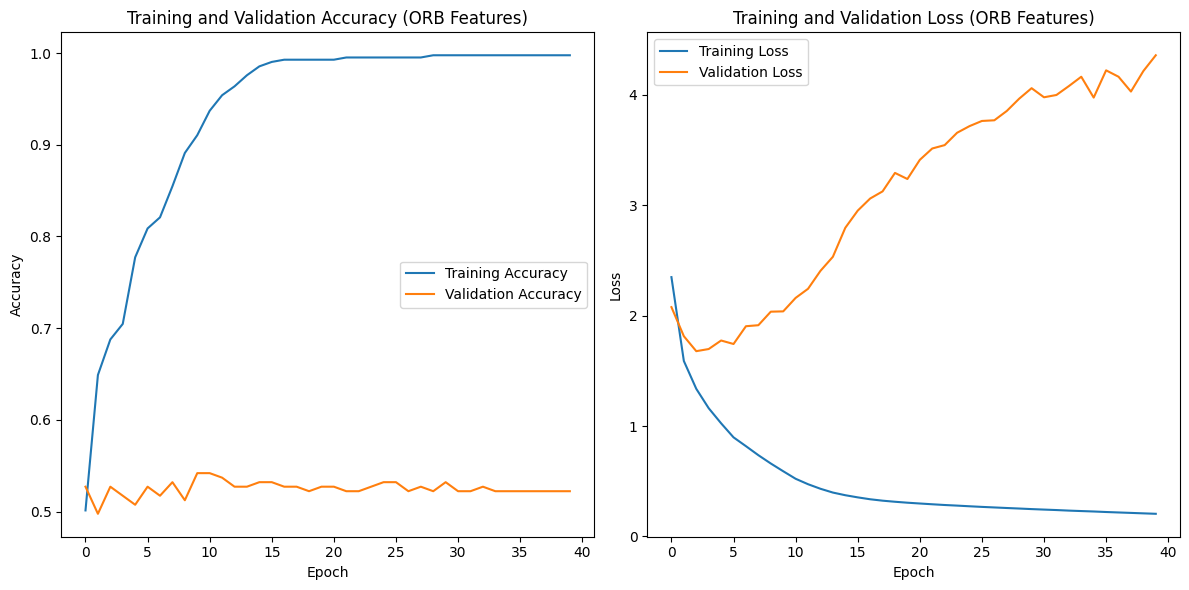

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Classification Report (HOG Features):
               precision    recall  f1-score   support

           0       0.10      0.06      0.08        16
           1       0.61      0.79      0.69       219
           2       0.38      0.30      0.33       101
           3       0.18      0.07      0.11        40
           4       0.00      0.00      0.00        19

    accuracy                           0.52       395
   macro avg       0.25      0.24      0.24       395
weighted avg       0.46      0.52      0.48       395



In [ ]:
# 3rd experment : Hidden Layers: [256, 128, 64] , Epochs: 40,  Learning Rate = 0.001
# Define the number of input features (size of HOG feature vector)
input_shape = x_train_orb_bovw.shape[1]

# Define the number of output classes (number of unique diagnoses)
num_classes = len(derm_data.df['diagnosis'].unique()) # Ensure num_classes is defined if not already



# Build the ANN model
orb_model_3 = Sequential([
    Input(shape=(input_shape,)),  # Input layer matching the HOG feature size
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)), # 2nd hidden layer with 128 units and ReLU activation
    Dense(64, activation='relu'),  # 3rd hidden layer with 64 units and ReLU activation
    Dense(num_classes, activation='softmax') # Output layer with softmax for multi-class classification
])


# Print the model summary
orb_model_3.summary()

# Compile the model
orb_model_3.compile(optimizer='adam', # Using Adam optimizer
              loss='categorical_crossentropy', # Suitable for multi-class classification with one-hot labels
              metrics=['accuracy']) # Monitor accuracy

# Train the model
epochs = 40
batch_size = 32

history_orb_3 = orb_model_3.fit(x_train_orb_bovw, y_train_one_hot,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_valid_orb_bovw, y_valid_one_hot))

print("\nModel training complete.")

# Evaluate the model on the ORB features of the test data
test_loss, test_acc = orb_model_3.evaluate(x_test_orb_bovw, y_test_one_hot, verbose=2)

# Print test accuracy
print(f"Test Accuracy using ORB features: {test_acc:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_orb_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_orb_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (ORB Features)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_orb_3.history['loss'], label='Training Loss')
plt.plot(history_orb_3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (ORB Features)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Convert one-hot encoded true labels back to single label format
y_test_labels_orb_3 = np.argmax(y_test_one_hot, axis=1)

# Convert predicted probabilities to class labels for the HOG model
# Make sure y_pred_classes is from the HOG model prediction on the test set
y_pred_labels_orb_3 = np.argmax(orb_model_3.predict(x_test_orb_bovw), axis=1)


# Display a classification report for the HOG model
class_report_orb_3 = classification_report(y_test_labels_orb_3, y_pred_labels_orb_3, zero_division=0)
print("Classification Report (HOG Features):\n", class_report_orb_3)

# Experiment 4 with dropout

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,308 (266.83 KB)

 Trainable params: 68,308 (266.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - accuracy: 0.3471 - loss: 2.9962 - val_accuracy: 0.4926 - val_loss: 2.2161
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5894 - loss: 1.9555 - val_accuracy: 0.4877 - val_loss: 1.9205
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5698 - loss: 1.7021 - val_accuracy: 0.5172 - val_loss: 1.7836
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5795 - loss: 1.5462 - val_accuracy: 0.5172 - val_loss: 1.7027
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6303 - loss: 1.4294 - val_accuracy: 0.5123 - val_loss: 1.6883
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6173 - loss: 1.3848 - val_accuracy: 0.5419 - val_loss: 1.6301
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6060 - loss: 1.3503 - val_accuracy: 0.5517 - val_loss: 1.5982
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6836 - loss: 1.2254 - val_accuracy: 0.5222 - val_los

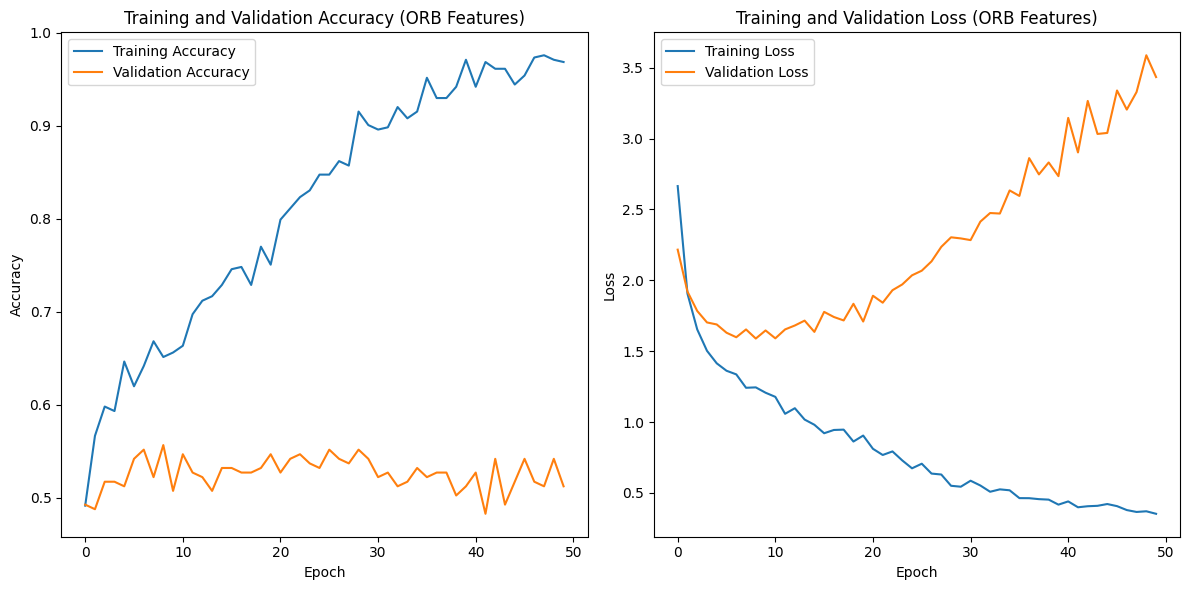

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
Classification Report (HOG Features):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.64      0.83      0.72       219
           2       0.48      0.40      0.43       101
           3       0.29      0.15      0.20        40
           4       0.00      0.00      0.00        19

    accuracy                           0.57       395
   macro avg       0.28      0.27      0.27       395
weighted avg       0.51      0.57      0.53       395



In [ ]:

# Define the number of input features (size of HOG feature vector)
input_shape = x_train_orb_bovw.shape[1]

# Define the number of output classes (number of unique diagnoses)
num_classes = len(derm_data.df['diagnosis'].unique()) # Ensure num_classes is defined if not already


# Build the ANN model
orb_model = Sequential([
    Input(shape=(input_shape,)),  # Input layer matching the ORB feature size
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)), # 2nd hidden layer with 128 units and ReLU activation
    Dropout(0.3),
    Dense(64, activation='relu'),  # 3rd hidden layer with 64 units and ReLU activation
    Dense(num_classes, activation='softmax') # Output layer with softmax for multi-class classification
])


# Print the model summary
orb_model.summary()

# Compile the model
orb_model.compile(optimizer='adam', # Using Adam optimizer
              loss='categorical_crossentropy', # Suitable for multi-class classification with one-hot labels
              metrics=['accuracy']) # Monitor accuracy

# Train the model
# I'll train for a fixed number of epochs and use the validation data
epochs = 50
batch_size = 32

history_orb = orb_model.fit(x_train_orb_bovw, y_train_one_hot,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_valid_orb_bovw, y_valid_one_hot))

print("\nModel training complete.")

# Evaluate the model on the ORB features of the test data
test_loss, test_acc = orb_model.evaluate(x_test_orb_bovw, y_test_one_hot, verbose=2)

# Print test accuracy
print(f"Test Accuracy using ORB features: {test_acc:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_orb.history['accuracy'], label='Training Accuracy')
plt.plot(history_orb.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (ORB Features)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_orb.history['loss'], label='Training Loss')
plt.plot(history_orb.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (ORB Features)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Convert one-hot encoded true labels back to single label format
y_test_labels_orb = np.argmax(y_test_one_hot, axis=1)

# Convert predicted probabilities to class labels for the HOG model
# Make sure y_pred_classes is from the HOG model prediction on the test set
y_pred_labels_orb = np.argmax(orb_model.predict(x_test_orb_bovw), axis=1)


# Display a classification report for the HOG model
class_report_orb = classification_report(y_test_labels_orb, y_pred_labels_orb, zero_division=0)
print("Classification Report (HOG Features):\n", class_report_orb)

> visulize

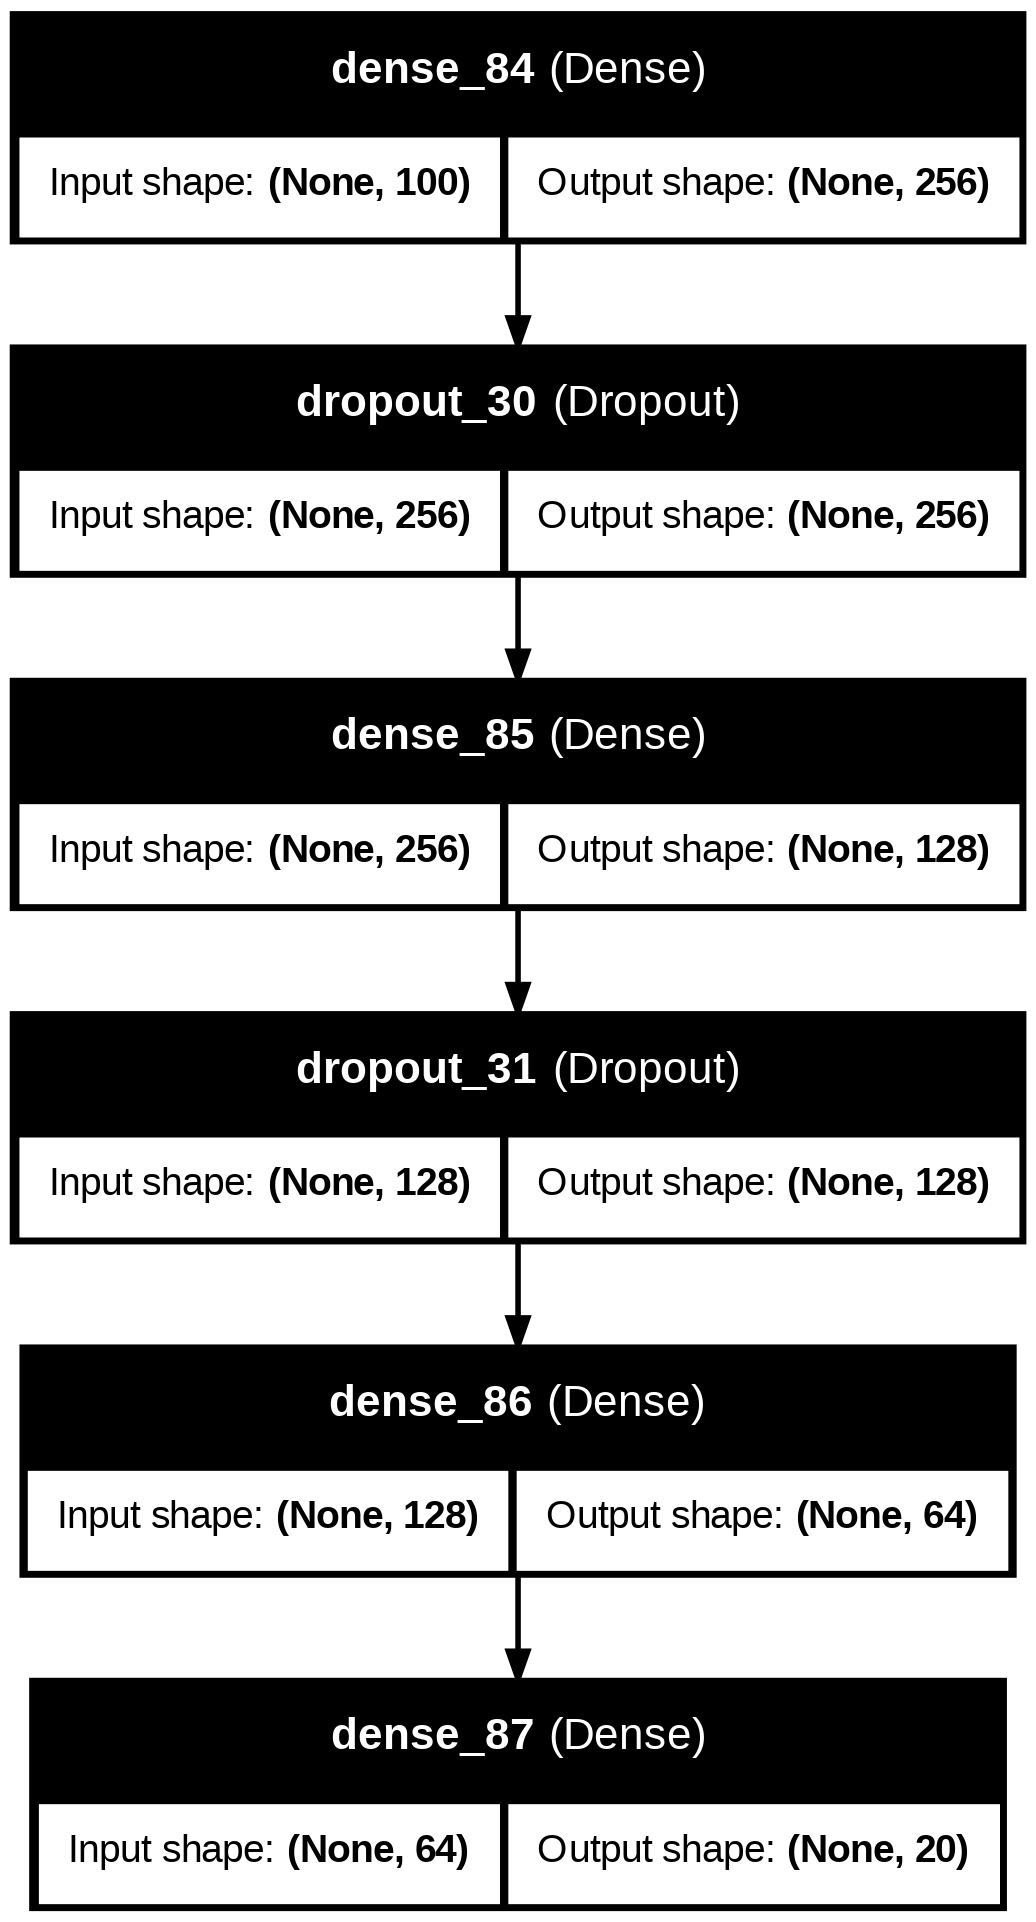

In [ ]:

# Visualize the model architecture and save to file
plot_model(orb_model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the image in the notebook
Image(filename='model.png')

#### 2. SVM Classification



### SVM Classification (HOG Features)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


#  Experiment 1

In [ ]:

# 1st experment: Kernel: sigmoid, C value= 1.0

# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_labels = y_test.values if isinstance(y_test, pd.Series) else y_test


# Initialize the SVM classifier
svm_model_hog_1 = SVC(kernel='sigmoid', C=1, random_state=42)

# Train the SVM model
print("Training SVM model with HOG features...")
svm_model_hog_1.fit(x_train_hog, y_train)
print("Training complete.")

# Evaluate the model on the test data
print("\nEvaluating SVM model with HOG features on test data...")
y_pred_hog_svm_1= svm_model_hog_1.predict(x_test_hog)

# Calculate and print the accuracy
accuracy_hog_svm = accuracy_score(y_test, y_pred_hog_svm_1)
print(f"Test Accuracy (SVM with HOG features): {accuracy_hog_svm:.4f}")
# Display the classification report, setting zero_division to 0 to suppress the warning
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_hog_svm_1, zero_division=0))



# Generate learning curves
#  y_train_labels for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    svm_model_hog_1, x_train_hog, y_train_labels, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (SVM - HOG Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Training SVM model with HOG features...
Training complete.

Evaluating SVM model with HOG features on test data...
Test Accuracy (SVM with HOG features): 0.5544

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.55      1.00      0.71       219
           2       0.00      0.00      0.00       101
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        19

    accuracy                           0.55       395
   macro avg       0.11      0.20      0.14       395
weighted avg       0.31      0.55      0.40       395



#  Experiment 2

In [ ]:

# 2nd experment: Kernel: linear, C value= 1.0

# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_labels = y_test.values if isinstance(y_test, pd.Series) else y_test


# Initialize the SVM classifier
svm_model_hog_2 = SVC(kernel='linear', C=1, random_state=42)

# Train the SVM model
print("Training SVM model with HOG features...")
svm_model_hog_2.fit(x_train_hog, y_train)
print("Training complete.")

# Evaluate the model on the test data
print("\nEvaluating SVM model with HOG features on test data...")
y_pred_hog_svm_2= svm_model_hog_2.predict(x_test_hog)

# Calculate and print the accuracy
accuracy_hog_svm = accuracy_score(y_test, y_pred_hog_svm_2)
print(f"Test Accuracy (SVM with HOG features): {accuracy_hog_svm:.4f}")
# Display the classification report, setting zero_division to 0 to suppress the warning
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_hog_svm_2, zero_division=0))



# Generate learning curves
#  y_train_labels for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    svm_model_hog_2, x_train_hog, y_train_labels, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (SVM - HOG Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Training SVM model with HOG features...
Training complete.

Evaluating SVM model with HOG features on test data...
Test Accuracy (SVM with HOG features): 0.5443

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.58      0.86      0.69       219
           2       0.39      0.25      0.30       101
           3       0.17      0.03      0.04        40
           4       0.00      0.00      0.00        19

    accuracy                           0.54       395
   macro avg       0.23      0.23      0.21       395
weighted avg       0.44      0.54      0.47       395



#  Experiment 3

In [ ]:
# 3rd experment: Kernel: poly, degree=3, C value= 10.0

# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_labels = y_test.values if isinstance(y_test, pd.Series) else y_test


# Initialize the SVM classifier
svm_model_hog_3 = SVC(kernel='poly',degree=3, C=10, random_state=42)

# Train the SVM model
print("Training SVM model with HOG features...")
svm_model_hog_3.fit(x_train_hog, y_train)
print("Training complete.")

# Evaluate the model on the test data
print("\nEvaluating SVM model with HOG features on test data...")
y_pred_hog_svm_3= svm_model_hog_3.predict(x_test_hog)

# Calculate and print the accuracy
accuracy_hog_svm = accuracy_score(y_test, y_pred_hog_svm_3)
print(f"Test Accuracy (SVM with HOG features): {accuracy_hog_svm:.4f}")
# Display the classification report, setting zero_division to 0 to suppress the warning
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_hog_svm_3, zero_division=0))



# Generate learning curves
#  y_train_labels for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    svm_model_hog_3, x_train_hog, y_train_labels, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (SVM - HOG Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Training SVM model with HOG features...
Training complete.

Evaluating SVM model with HOG features on test data...
Test Accuracy (SVM with HOG features): 0.5570

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.57      0.91      0.71       219
           2       0.41      0.19      0.26       101
           3       1.00      0.03      0.05        40
           4       0.00      0.00      0.00        19

    accuracy                           0.56       395
   macro avg       0.40      0.23      0.20       395
weighted avg       0.53      0.56      0.46       395



#  Experiment 4

Training SVM model with HOG features...
Training complete.

Evaluating SVM model with HOG features on test data...
Test Accuracy (SVM with HOG features): 0.5646

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.57      0.97      0.72       219
           2       0.47      0.09      0.15       101
           3       1.00      0.03      0.05        40
           4       0.00      0.00      0.00        19

    accuracy                           0.56       395
   macro avg       0.41      0.22      0.18       395
weighted avg       0.54      0.56      0.44       395



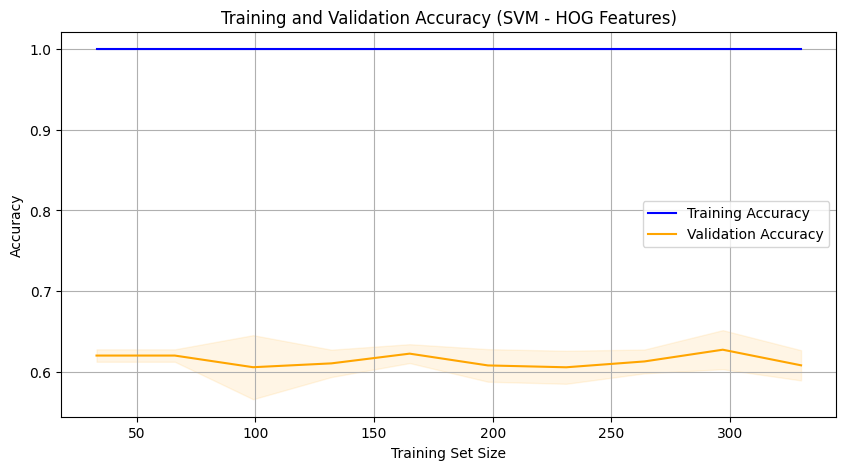

In [ ]:

# 4th experment: Kernel: poly, degree=5, C value= 10.0    Gamma= scale

# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_labels = y_test.values if isinstance(y_test, pd.Series) else y_test

# Initialize the SVM classifier
svm_model_hog = SVC(kernel='poly', degree=7, C=10, gamma='scale', random_state=42)

# Train the SVM model
print("Training SVM model with HOG features...")
svm_model_hog.fit(x_train_hog, y_train)
print("Training complete.")

# Evaluate the model on the test data
print("\nEvaluating SVM model with HOG features on test data...")
y_pred_hog_svm = svm_model_hog.predict(x_test_hog)

# Calculate and print the accuracy
accuracy_hog_svm = accuracy_score(y_test, y_pred_hog_svm)
print(f"Test Accuracy (SVM with HOG features): {accuracy_hog_svm:.4f}")
# Display the classification report, setting zero_division to 0 to suppress the warning
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_hog_svm, zero_division=0))



# Generate learning curves
#  y_train_labels for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    svm_model_hog, x_train_hog, y_train_labels, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (SVM - HOG Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### SVM Classification (ORB Features)

#  Experiment 1

Training SVM model with ORB features...
Training complete.

Evaluating SVM model with ORB features on test data...
Test Accuracy (SVM with ORB features): 0.4987


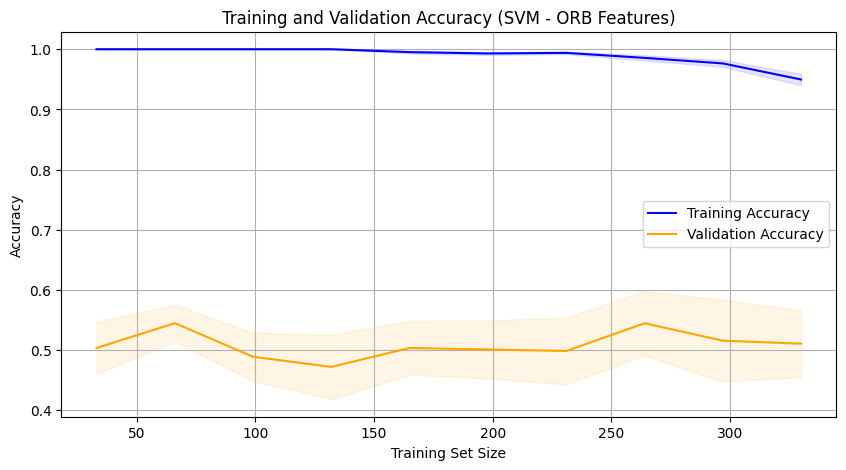


Classification Report (SVM with ORB features):
               precision    recall  f1-score   support

           0       0.08      0.19      0.11        16
           1       0.66      0.72      0.69       219
           2       0.45      0.30      0.36       101
           3       0.21      0.15      0.17        40
           4       0.05      0.05      0.05        19

    accuracy                           0.50       395
   macro avg       0.29      0.28      0.28       395
weighted avg       0.51      0.50      0.50       395



In [ ]:
# 1st experment: Kernel: Linear, C value= 1.0
# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_labels = y_test.values if isinstance(y_test, pd.Series) else y_test



# Initialize the SVM classifier for ORB features
# Using a linear kernel as a starting point

svm_model_orb_1 = SVC(kernel='linear',  C=1, random_state=42)

# Train the SVM model
print("Training SVM model with ORB features...")
# Make sure x_train_orb_bovw and y_train are ready
svm_model_orb_1.fit(x_train_orb_bovw, y_train)
print("Training complete.")

# Evaluate the model on the test data
print("\nEvaluating SVM model with ORB features on test data...")
# Make sure x_test_orb_bovw and y_test are ready
y_pred_orb_svm_1 = svm_model_orb_1.predict(x_test_orb_bovw)

# Calculate and print the accuracy
accuracy_orb_svm = accuracy_score(y_test, y_pred_orb_svm_1)
print(f"Test Accuracy (SVM with ORB features): {accuracy_orb_svm:.4f}")

#  Generate learning curves
# Use y_train_labels for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    svm_model_orb_1, x_train_orb_bovw, y_train_labels, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

#  Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (SVM - ORB Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
# Display the classification report
class_report_orb_svm = classification_report(y_test, y_pred_orb_svm_1)
print("\nClassification Report (SVM with ORB features):\n", class_report_orb_svm)




#  Experiment 2

In [ ]:
# 2nd experment: Kernel: poly, degree=5, C value= 1.0
# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels_2 = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_labels_2 = y_test.values if isinstance(y_test, pd.Series) else y_test



# Initialize the SVM classifier for ORB features
# Using a poly kernel as a starting point

svm_model_orb_2 = SVC(kernel='poly',degree=5,  C=1, random_state=42)

# Train the SVM model
print("Training SVM model with ORB features...")

svm_model_orb_2.fit(x_train_orb_bovw, y_train)
print("Training complete.")

# Evaluate the model on the test data
print("\nEvaluating SVM model with ORB features on test data...")

y_pred_orb_svm_2 = svm_model_orb_2.predict(x_test_orb_bovw)

# Calculate and print the accuracy
accuracy_orb_svm = accuracy_score(y_test, y_pred_orb_svm_2)
print(f"Test Accuracy (SVM with ORB features): {accuracy_orb_svm:.4f}")

#  Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    svm_model_orb_2, x_train_orb_bovw, y_train_labels_2, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

#  Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (SVM - ORB Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
# Display the classification report
class_report_orb_svm_2 = classification_report(y_test, y_pred_orb_svm_2)
print("\nClassification Report (SVM with ORB features):\n", class_report_orb_svm_2)




Training SVM model with ORB features...
Training complete.

Evaluating SVM model with ORB features on test data...
Test Accuracy (SVM with ORB features): 0.5291



Classification Report (SVM with ORB features):
               precision    recall  f1-score   support

           0       0.05      0.06      0.05        16
           1       0.58      0.87      0.69       219
           2       0.48      0.16      0.24       101
           3       0.00      0.00      0.00        40
           4       0.11      0.05      0.07        19

    accuracy                           0.53       395
   macro avg       0.24      0.23      0.21       395
weighted avg       0.45      0.53      0.45       395



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#  Experiment 3

Training SVM model with ORB features...
Training complete.

Evaluating SVM model with ORB features on test data...
Test Accuracy (SVM with ORB features): 0.5063


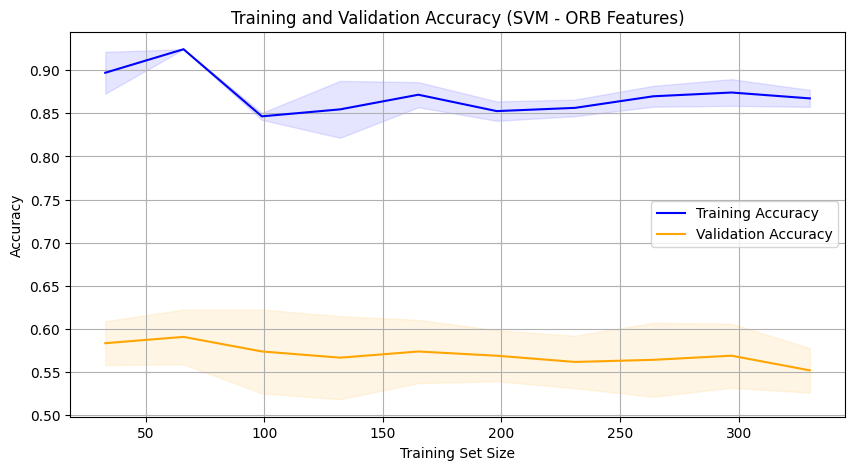


Classification Report (SVM with ORB features):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.58      0.82      0.68       219
           2       0.44      0.20      0.27       101
           3       0.00      0.00      0.00        40
           4       0.10      0.05      0.07        19

    accuracy                           0.51       395
   macro avg       0.22      0.21      0.20       395
weighted avg       0.44      0.51      0.45       395



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 3rd experment: Kernel: poly, degree=3, C value= 8.0 ,
# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels_3 = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_labels_3 = y_test.values if isinstance(y_test, pd.Series) else y_test



# Initialize the SVM classifier for ORB features
# Using a poly kernel as a starting point

svm_model_orb_3 = SVC(kernel='poly',degree=3,  C=8, random_state=42)

# Train the SVM model
print("Training SVM model with ORB features...")

svm_model_orb_3.fit(x_train_orb_bovw, y_train)
print("Training complete.")

# Evaluate the model on the test data
print("\nEvaluating SVM model with ORB features on test data...")

y_pred_orb_svm_3 = svm_model_orb_3.predict(x_test_orb_bovw)

# Calculate and print the accuracy
accuracy_orb_svm_3 = accuracy_score(y_test, y_pred_orb_svm_3)
print(f"Test Accuracy (SVM with ORB features): {accuracy_orb_svm_3:.4f}")

#  Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    svm_model_orb_3, x_train_orb_bovw, y_train_labels_3, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

#  Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (SVM - ORB Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
# Display the classification report
class_report_orb_svm_3 = classification_report(y_test, y_pred_orb_svm_3)
print("\nClassification Report (SVM with ORB features):\n", class_report_orb_svm_3)




#  Experiment 4

Training SVM model with ORB features...
Training complete.

Evaluating SVM model with ORB features on test data...
Test Accuracy (SVM with ORB features): 0.5595


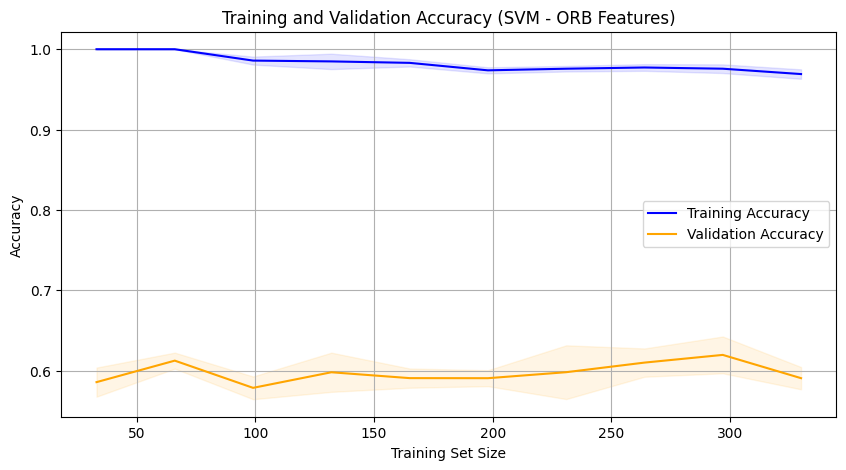


Classification Report (SVM with ORB features):
               precision    recall  f1-score   support

           0       0.25      0.12      0.17        16
           1       0.60      0.88      0.72       219
           2       0.43      0.26      0.32       101
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        19

    accuracy                           0.56       395
   macro avg       0.26      0.25      0.24       395
weighted avg       0.45      0.56      0.49       395



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

# 4th experment: Kernel: rbf, degree=5, C value= 10.0

# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_labels = y_test.values if isinstance(y_test, pd.Series) else y_test


# Initialize the SVM classifier for ORB features
# Using a linear kernel as a starting point

svm_model_orb = SVC(kernel='rbf',degree=5,  C=10, random_state=42)

# Train the SVM model
print("Training SVM model with ORB features...")
# Make sure x_train_orb_bovw and y_train are ready
svm_model_orb.fit(x_train_orb_bovw, y_train)
print("Training complete.")

# Evaluate the model on the test data
print("\nEvaluating SVM model with ORB features on test data...")
# Make sure x_test_orb_bovw and y_test are ready
y_pred_orb_svm = svm_model_orb.predict(x_test_orb_bovw)

# Calculate and print the accuracy
accuracy_orb_svm = accuracy_score(y_test, y_pred_orb_svm)
print(f"Test Accuracy (SVM with ORB features): {accuracy_orb_svm:.4f}")

#  Generate learning curves
# Use y_train_labels for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    svm_model_orb, x_train_orb_bovw, y_train_labels, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

#  Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (SVM - ORB Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
# Display the classification report
class_report_orb_svm = classification_report(y_test, y_pred_orb_svm)
print("\nClassification Report (SVM with ORB features):\n", class_report_orb_svm)




#### 3. KNN Classification



### KNN Classification (HOG Features)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Experiment 1

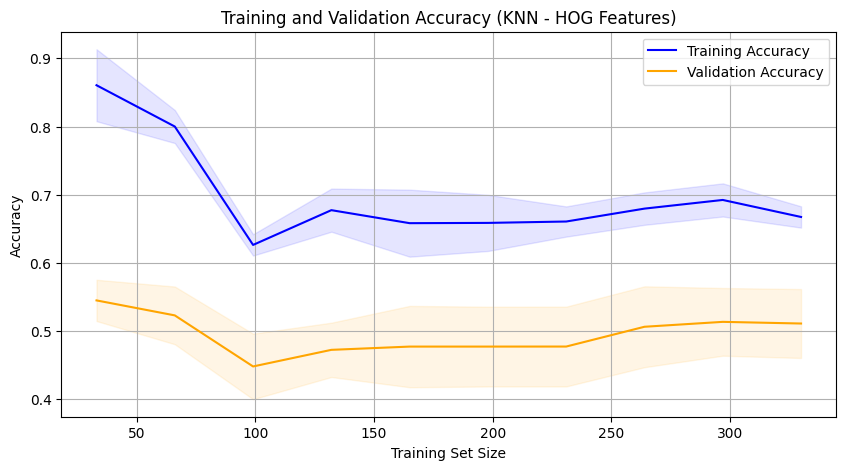

Training KNN model with HOG features...
Training complete.

Evaluating KNN model with HOG features on test data...
KNN Test Accuracy (HOG Features): 0.46

Classification Report (KNN with HOG Features):
               precision    recall  f1-score   support

           0       0.10      0.12      0.11        16
           1       0.56      0.76      0.65       219
           2       0.42      0.05      0.09       101
           3       0.12      0.20      0.15        40
           4       0.00      0.00      0.00        19

    accuracy                           0.46       395
   macro avg       0.24      0.23      0.20       395
weighted avg       0.43      0.46      0.40       395



In [ ]:
# 1st Experiment: n_neighbors=3, weights='uniform', metric='euclidean'

# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels_1 = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_label_1 = y_test.values if isinstance(y_test, pd.Series) else y_test


#  Define the model
knn_model_hog_1 = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean')

# Generate learning curves
# Use y_train_labels for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    knn_model_hog_1, x_train_hog, y_train_labels_1, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

#  Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (KNN - HOG Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Train final model on full training set
print("Training KNN model with HOG features...")
knn_model_hog_1.fit(x_train_hog, y_train_labels_1)
print("Training complete.")

# Predict on test set
print("\nEvaluating KNN model with HOG features on test data...")
y_pred_knn_hog_1 = knn_model_hog_1.predict(x_test_hog)

#  Evaluate final model
accuracy_knn_hog_1 = accuracy_score(y_test_label_1, y_pred_knn_hog_1)
print(f"KNN Test Accuracy (HOG Features): {accuracy_knn_hog_1:.2f}")
# Display the classification report, setting zero_division to 0 to suppress the warning
print("\nClassification Report (KNN with HOG Features):\n", classification_report(y_test_label_1, y_pred_knn_hog_1, zero_division=0))



# Experiment 2

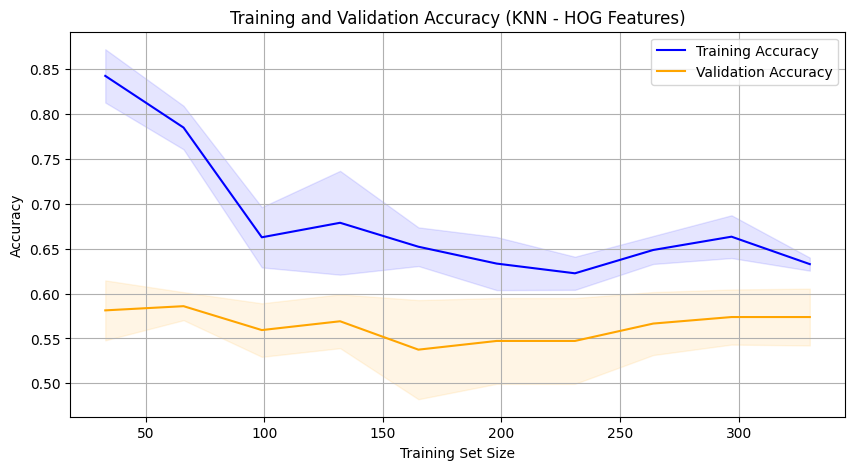

Training KNN model with HOG features...
Training complete.

Evaluating KNN model with HOG features on test data...
KNN Test Accuracy (HOG Features): 0.54

Classification Report (KNN with HOG Features):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.57      0.93      0.71       219
           2       0.33      0.03      0.05       101
           3       0.25      0.17      0.21        40
           4       0.00      0.00      0.00        19

    accuracy                           0.54       395
   macro avg       0.23      0.23      0.19       395
weighted avg       0.43      0.54      0.43       395



In [ ]:
# 2nd Experiment: n_neighbors=5, weights='uniform', metric='euclidean'.   KNN Test Accuracy (HOG Features): 0.54

# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels_2 = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_label_2 = y_test.values if isinstance(y_test, pd.Series) else y_test


#  Define the model
knn_model_hog_2 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# Generate learning curves
# Use y_train_labels for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    knn_model_hog_2, x_train_hog, y_train_labels_2, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

#  Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (KNN - HOG Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Train final model on full training set
print("Training KNN model with HOG features...")
knn_model_hog_2.fit(x_train_hog, y_train_labels_2)
print("Training complete.")

# Predict on test set
print("\nEvaluating KNN model with HOG features on test data...")
y_pred_knn_hog_2 = knn_model_hog_2.predict(x_test_hog)

#  Evaluate final model
accuracy_knn_hog_2 = accuracy_score(y_test_label_2, y_pred_knn_hog_2)
print(f"KNN Test Accuracy (HOG Features): {accuracy_knn_hog_2:.2f}")
# Display the classification report, setting zero_division to 0 to suppress the warning
print("\nClassification Report (KNN with HOG Features):\n", classification_report(y_test_label_2, y_pred_knn_hog_2, zero_division=0))



# Experiment 3

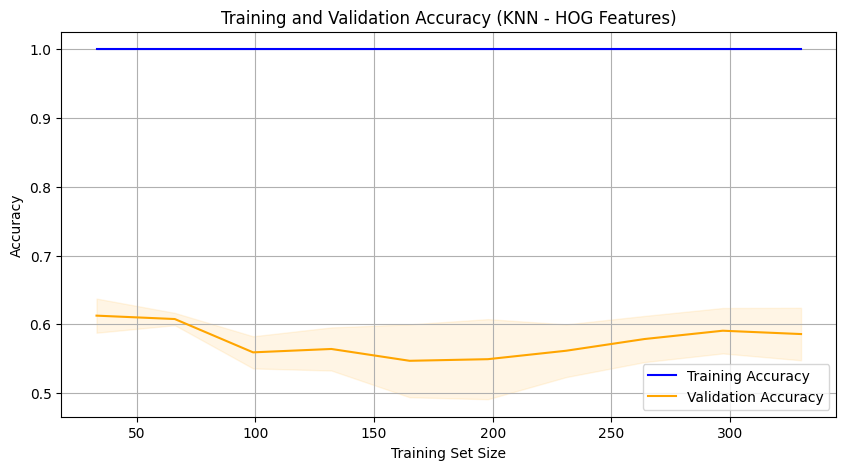

Training KNN model with HOG features...
Training complete.

Evaluating KNN model with HOG features on test data...
KNN Test Accuracy (HOG Features): 0.55

Classification Report (KNN with HOG Features):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.57      0.94      0.71       219
           2       0.56      0.05      0.09       101
           3       0.24      0.15      0.18        40
           4       0.00      0.00      0.00        19

    accuracy                           0.55       395
   macro avg       0.27      0.23      0.20       395
weighted avg       0.48      0.55      0.43       395



In [ ]:
# 3rd Experiment: n_neighbors=7, weights='distance',metric='manhattan'.   KNN Test Accuracy (HOG Features): 0.55

# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels_3 = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_label_3 = y_test.values if isinstance(y_test, pd.Series) else y_test


#  Define the model
knn_model_hog_3 = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan')

# Generate learning curves
# Use y_train_labels for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    knn_model_hog_3, x_train_hog, y_train_labels_3, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

#  Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (KNN - HOG Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Train final model on full training set
print("Training KNN model with HOG features...")
knn_model_hog_3.fit(x_train_hog, y_train_labels_3)
print("Training complete.")

# Predict on test set
print("\nEvaluating KNN model with HOG features on test data...")
y_pred_knn_hog_3 = knn_model_hog_3.predict(x_test_hog)

#  Evaluate final model
accuracy_knn_hog_3 = accuracy_score(y_test_label_3, y_pred_knn_hog_3)
print(f"KNN Test Accuracy (HOG Features): {accuracy_knn_hog_3:.2f}")
# Display the classification report, setting zero_division to 0 to suppress the warning
print("\nClassification Report (KNN with HOG Features):\n", classification_report(y_test_label_3, y_pred_knn_hog_3, zero_division=0))



# Experiment 4

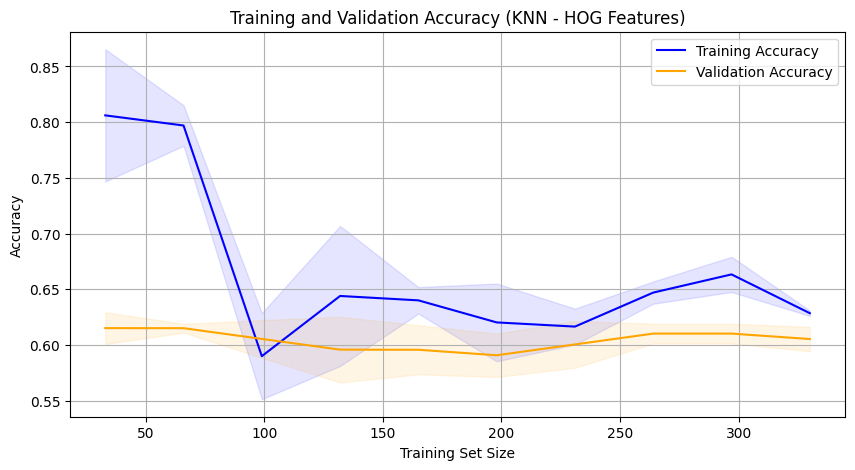

Training KNN model with HOG features...
Training complete.

Evaluating KNN model with HOG features on test data...
KNN Test Accuracy (HOG Features): 0.56

Classification Report (KNN with HOG Features):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.57      0.99      0.72       219
           2       0.50      0.02      0.04       101
           3       0.25      0.05      0.08        40
           4       0.00      0.00      0.00        19

    accuracy                           0.56       395
   macro avg       0.26      0.21      0.17       395
weighted avg       0.47      0.56      0.42       395



In [ ]:
# 4th Experiment: n_neighbors=9, weights:'uniform', metric: 'manhattan'.  KNN Test Accuracy (HOG Features): 0.56 best one
# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_labels = y_test.values if isinstance(y_test, pd.Series) else y_test




#  Define the model
knn_model_hog = KNeighborsClassifier(n_neighbors=9, weights='uniform', metric='manhattan')



# Generate learning curves
# Use y_train_labels for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    knn_model_hog, x_train_hog, y_train_labels, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

#  Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (KNN - HOG Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Train final model on full training set
print("Training KNN model with HOG features...")
knn_model_hog.fit(x_train_hog, y_train_labels)
print("Training complete.")

# Predict on test set
print("\nEvaluating KNN model with HOG features on test data...")
y_pred_knn_hog = knn_model_hog.predict(x_test_hog)

#  Evaluate final model
accuracy_knn_hog = accuracy_score(y_test_labels, y_pred_knn_hog)
print(f"KNN Test Accuracy (HOG Features): {accuracy_knn_hog:.2f}")
# Display the classification report, setting zero_division to 0 to suppress the warning
print("\nClassification Report (KNN with HOG Features):\n", classification_report(y_test_labels, y_pred_knn_hog, zero_division=0))



### KNN Classification (ORB Features)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Experiment 1

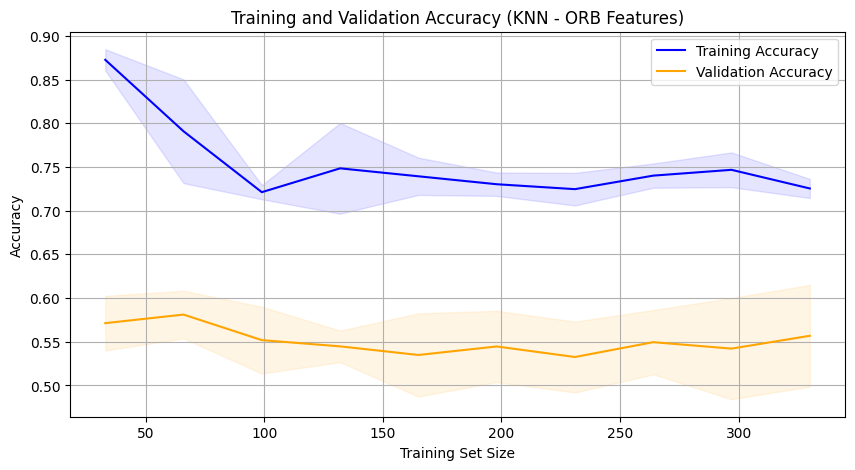

Training KNN model with ORB features...
Training complete.

Evaluating KNN model with ORB features on test data...
KNN Test Accuracy (ORB Features): 0.51

Classification Report (KNN with ORB Features):
               precision    recall  f1-score   support

           0       0.11      0.19      0.14        16
           1       0.60      0.82      0.69       219
           2       0.30      0.14      0.19       101
           3       0.23      0.12      0.16        40
           4       0.33      0.05      0.09        19

    accuracy                           0.51       395
   macro avg       0.32      0.26      0.26       395
weighted avg       0.46      0.51      0.46       395



In [ ]:

# 1st Experiment: n_neighbors=3, weights='uniform', metric='euclidean' KNN Test Accuracy (ORB Features): 0.51

# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels_1 = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_labels_1 = y_test.values if isinstance(y_test, pd.Series) else y_test

# Define the model
knn_model_orb_1 = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean')



#  Generate learning curves
# Use y_train_labels for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    knn_model_orb_1, x_train_orb_bovw, y_train_labels_1, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

#  Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (KNN - ORB Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


#  Train final model on full training set
print("Training KNN model with ORB features...")
knn_model_orb_1.fit(x_train_orb_bovw, y_train_labels_1)
print("Training complete.")

#  Predict on test set
print("\nEvaluating KNN model with ORB features on test data...")
y_pred_knn_orb_1 = knn_model_orb_1.predict(x_test_orb_bovw)

#  Evaluate final model
accuracy_knn_orb_1 = accuracy_score(y_test_labels_1, y_pred_knn_orb_1)
print(f"KNN Test Accuracy (ORB Features): {accuracy_knn_orb_1:.2f}")
# Display the classification report, setting zero_division to 0 to suppress the warning
print("\nClassification Report (KNN with ORB Features):\n", classification_report(y_test_labels_1, y_pred_knn_orb_1, zero_division=0))


# Experiment 2

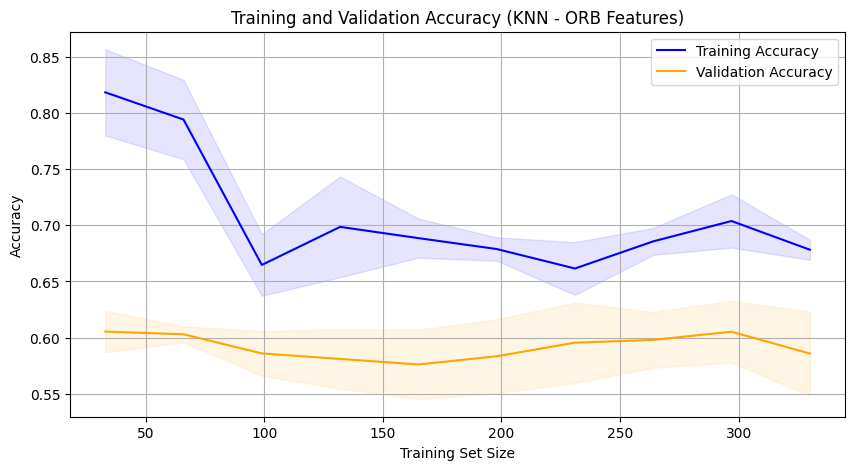

Training KNN model with ORB features...
Training complete.

Evaluating KNN model with ORB features on test data...
KNN Test Accuracy (ORB Features): 0.53

Classification Report (KNN with ORB Features):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.60      0.86      0.71       219
           2       0.34      0.20      0.25       101
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        19

    accuracy                           0.53       395
   macro avg       0.19      0.21      0.19       395
weighted avg       0.42      0.53      0.45       395



In [ ]:
# 2nd Experiment: n_neighbors=5, weights='uniform', metric='euclidean'. KNN Test Accuracy (ORB Features): 0.53

# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels_2 = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_labels_2 = y_test.values if isinstance(y_test, pd.Series) else y_test

# Define the model
knn_model_orb_2 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')



#  Generate learning curves
# Use y_train_labels for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    knn_model_orb_2, x_train_orb_bovw, y_train_labels_2, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

#  Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (KNN - ORB Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


#  Train final model on full training set
print("Training KNN model with ORB features...")
knn_model_orb_2.fit(x_train_orb_bovw, y_train_labels_2)
print("Training complete.")

#  Predict on test set
print("\nEvaluating KNN model with ORB features on test data...")
y_pred_knn_orb_2 = knn_model_orb_2.predict(x_test_orb_bovw)

#  Evaluate final model
accuracy_knn_orb_2 = accuracy_score(y_test_labels_2, y_pred_knn_orb_2)
print(f"KNN Test Accuracy (ORB Features): {accuracy_knn_orb_2:.2f}")
# Display the classification report, setting zero_division to 0 to suppress the warning
print("\nClassification Report (KNN with ORB Features):\n", classification_report(y_test_labels_2, y_pred_knn_orb_2, zero_division=0))


# Experiment 3

In [ ]:
# 3rd Experiment: n_neighbors=7, weights='distance',metric='euclidean'.  KNN Test Accuracy (ORB Features): 0.53
# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels_3 = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_labels_3 = y_test.values if isinstance(y_test, pd.Series) else y_test

# Define the model
knn_model_orb_3 = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean')



#  Generate learning curves
# Use y_train_labels for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    knn_model_orb_3, x_train_orb_bovw, y_train_labels_3, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

#  Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (KNN - ORB Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


#  Train final model on full training set
print("Training KNN model with ORB features...")
knn_model_orb_3.fit(x_train_orb_bovw, y_train_labels_3)
print("Training complete.")

#  Predict on test set
print("\nEvaluating KNN model with ORB features on test data...")
y_pred_knn_orb_3 = knn_model_orb_3.predict(x_test_orb_bovw)

#  Evaluate final model
accuracy_knn_orb_3 = accuracy_score(y_test_labels_3, y_pred_knn_orb_3)
print(f"KNN Test Accuracy (ORB Features): {accuracy_knn_orb_3:.2f}")
# Display the classification report, setting zero_division to 0 to suppress the warning
print("\nClassification Report (KNN with ORB Features):\n", classification_report(y_test_labels_3, y_pred_knn_orb_3, zero_division=0))


Training KNN model with ORB features...
Training complete.

Evaluating KNN model with ORB features on test data...
KNN Test Accuracy (ORB Features): 0.53

Classification Report (KNN with ORB Features):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.60      0.86      0.71       219
           2       0.30      0.21      0.25       101
           3       0.10      0.03      0.04        40
           4       1.00      0.05      0.10        19

    accuracy                           0.53       395
   macro avg       0.40      0.23      0.22       395
weighted avg       0.47      0.53      0.46       395



# Experiment 4

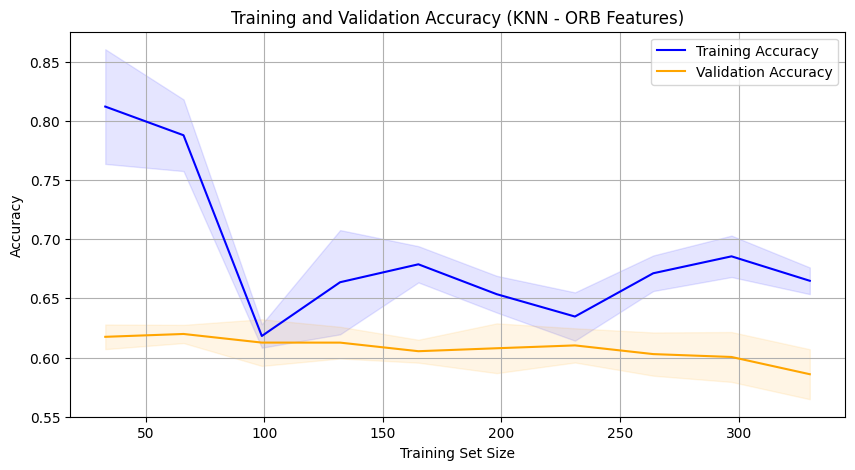

Training KNN model with ORB features...
Training complete.

Evaluating KNN model with ORB features on test data...
KNN Test Accuracy (ORB Features): 0.55

Classification Report (KNN with ORB Features):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.58      0.95      0.72       219
           2       0.42      0.11      0.17       101
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        19

    accuracy                           0.55       395
   macro avg       0.20      0.21      0.18       395
weighted avg       0.43      0.55      0.44       395



In [ ]:

# 4th Experiment: n_neighbors=9, weights:'uniform', metric: 'manhattan'.  KNN Test Accuracy (ORB Features): 0.55 best one

# Convert y_train and y_test to numpy arrays if they are pandas Series
y_train_labels = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_labels = y_test.values if isinstance(y_test, pd.Series) else y_test


# Define the model
knn_model_orb = KNeighborsClassifier(n_neighbors=9, weights='uniform', metric='manhattan')



#  Generate learning curves
# Use y_train_labels for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    knn_model_orb, x_train_orb_bovw, y_train_labels, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

#  Plot Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)
plt.title('Training and Validation Accuracy (KNN - ORB Features)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


#  Train final model on full training set
print("Training KNN model with ORB features...")
knn_model_orb.fit(x_train_orb_bovw, y_train_labels)
print("Training complete.")

#  Predict on test set
print("\nEvaluating KNN model with ORB features on test data...")
y_pred_knn_orb = knn_model_orb.predict(x_test_orb_bovw)

#  Evaluate final model
accuracy_knn_orb = accuracy_score(y_test_labels, y_pred_knn_orb)
print(f"KNN Test Accuracy (ORB Features): {accuracy_knn_orb:.2f}")
# Display the classification report, setting zero_division to 0 to suppress the warning
print("\nClassification Report (KNN with ORB Features):\n", classification_report(y_test_labels, y_pred_knn_orb, zero_division=0))


# Part 3: Model Comparison and Analysis

> * **T3.1 Confusion Matrices:**
 Generate confusion matrices for all models (classical and CNN-based)
to evaluate their performance on the test set.

> *  **T3.2 Dropout Impact:**
 Discuss the effect of dropout on overfitting and how it influenced the model
performance.

> *  **T3.3 Comparison:**
Compare the results from the classical pipelines (HOG, LBP, etc.) and CNN
models in terms of accuracy, precision, and recall.

## **T3.1 Confusion Matrices**
Generate confusion matrices for all models (CLASSICAL)
to evaluate their performance on the test set.

In [ ]:

#  y_test_one_hot, y_test, ann_model_hog, orb_model, svm_model_hog, svm_model_orb, knn_model_hog, knn_model_orb, x_test_hog, x_test_orb_bovw are available

# Get the true labels (using y_test for SVM and KNN, y_test_one_hot for ANN)
y_test_labels_ann_hog = np.argmax(y_test_one_hot, axis=1)
y_test_labels_ann_orb = np.argmax(y_test_one_hot, axis=1)
y_test_labels_svm_hog = y_test.values if isinstance(y_test, pd.Series) else y_test
y_test_labels_svm_orb = y_test.values if isinstance(y_test, pd.Series) else y_test
y_test_labels_knn_hog = y_test.values if isinstance(y_test, pd.Series) else y_test
y_test_labels_knn_orb = y_test.values if isinstance(y_test, pd.Series) else y_test


# Predict the classes for each model
y_pred_labels_ann_hog = np.argmax(ann_model_hog.predict(x_test_hog), axis=1)
y_pred_labels_ann_orb = np.argmax(orb_model.predict(x_test_orb_bovw), axis=1)
y_pred_labels_svm_hog = svm_model_hog.predict(x_test_hog)
y_pred_labels_svm_orb = svm_model_orb.predict(x_test_orb_bovw)
y_pred_labels_knn_hog = knn_model_hog.predict(x_test_hog)
y_pred_labels_knn_orb = knn_model_orb.predict(x_test_orb_bovw)

# Generate and display confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

conf_matrices = {
    'ANN (HOG)': (confusion_matrix(y_test_labels_ann_hog, y_pred_labels_ann_hog), axes[0]),
    'ANN (ORB)': (confusion_matrix(y_test_labels_ann_orb, y_pred_labels_ann_orb), axes[1]),
    'SVM (HOG)': (confusion_matrix(y_test_labels_svm_hog, y_pred_labels_svm_hog), axes[2]),
    'SVM (ORB)': (confusion_matrix(y_test_labels_svm_orb, y_pred_labels_svm_orb), axes[3]),
    'KNN (HOG)': (confusion_matrix(y_test_labels_knn_hog, y_pred_labels_knn_hog), axes[4]),
    'KNN (ORB)': (confusion_matrix(y_test_labels_knn_orb, y_pred_labels_knn_orb), axes[5]),
}

for title, (matrix, ax) in conf_matrices.items():
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


## **T3.3 Comparison:**

Comparing the classical models based on the classification reports and the test accuracies (from the next cell):

**Overall Accuracy:**
ANN (HOG) = **0.57**, ANN (ORB) = **0.57** (tied highest) → SVM (HOG/ORB) ≈ **0.56** → KNN (HOG) **0.56**, KNN (ORB) **0.55**. Overall: **ANN ≥ SVM ≥ KNN**; ORB does **not** improve accuracy except it keeps ANN tied for best.

**Precision, Recall, and F1-score:**

* **Macro averages (class-balanced):** Best **macro F1** = **ANN (ORB) 0.27** (macro P=0.28, R=0.27). Next: **SVM (ORB) 0.24**. Others ≈ 0.17–0.18.
* **Weighted averages (support-weighted):** Best **weighted F1** = **ANN (ORB) 0.53** (weighted P=0.51, R=0.57). Highest **weighted precision** is **SVM (HOG) 0.54** but with lower recall/F1 (0.44).

**Observations:**

* Metrics show **class imbalance** impact: strong performance on the dominant class, near-zero scores for minority classes → **low macro** averages.
* **ANN with ORB** yields the **most balanced performance** (best macro/weighted F1), suggesting ORB features suit ANN better than HOG.
* **SVM (HOG)** is the most **precision-oriented** (highest weighted precision) but trades off recall/F1.
* **KNN** lags overall (esp. with ORB), likely due to **high-dimensional, sparse descriptors** and sensitivity to distance metrics; would benefit from tuning (k, metric) or dimensionality reduction.



In [ ]:
# Classification Reports for Classical Models
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Assuming y_test_one_hot, y_test, ann_model_hog, orb_model, svm_model_hog, svm_model_orb, knn_model_hog, knn_model_orb, x_test_hog, x_test_orb_bovw are available from previous cells

# Get the true labels
y_test_labels_ann_hog = np.argmax(y_test_one_hot, axis=1)
y_test_labels_ann_orb = np.argmax(y_test_one_hot, axis=1)
y_test_labels_svm_hog = y_test.values if isinstance(y_test, pd.Series) else y_test
y_test_labels_svm_orb = y_test.values if isinstance(y_test, pd.Series) else y_test
y_test_labels_knn_hog = y_test.values if isinstance(y_test, pd.Series) else y_test
y_test_labels_knn_orb = y_test.values if isinstance(y_test, pd.Series) else y_test

# Predict the classes for each model
y_pred_labels_ann_hog = np.argmax(ann_model_hog.predict(x_test_hog), axis=1)
y_pred_labels_ann_orb = np.argmax(orb_model.predict(x_test_orb_bovw), axis=1)
y_pred_labels_svm_hog = svm_model_hog.predict(x_test_hog)
y_pred_labels_svm_orb = svm_model_orb.predict(x_test_orb_bovw)
y_pred_labels_knn_hog = knn_model_hog.predict(x_test_hog)
y_pred_labels_knn_orb = knn_model_orb.predict(x_test_orb_bovw)

# Generate and print classification reports
print("--- Classification Report: ANN (HOG Features) ---")
print(classification_report(y_test_labels_ann_hog, y_pred_labels_ann_hog, zero_division=0))

print("\n--- Classification Report: ANN (ORB Features) ---")
print(classification_report(y_test_labels_ann_orb, y_pred_labels_ann_orb, zero_division=0))

print("\n--- Classification Report: SVM (HOG Features) ---")
print(classification_report(y_test_labels_svm_hog, y_pred_labels_svm_hog, zero_division=0))

print("\n--- Classification Report: SVM (ORB Features) ---")
print(classification_report(y_test_labels_svm_orb, y_pred_labels_svm_orb, zero_division=0))

print("\n--- Classification Report: KNN (HOG Features) ---")
print(classification_report(y_test_labels_knn_hog, y_pred_labels_knn_hog, zero_division=0))

print("\n--- Classification Report: KNN (ORB Features) ---")
print(classification_report(y_test_labels_knn_orb, y_pred_labels_knn_orb, zero_division=0))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
--- Classification Report: ANN (HOG Features) ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.58      0.99      0.73       219
           2       0.56      0.10      0.17       101
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        19

    accuracy                           0.57       395
   macro avg       0.23      0.22      0.18       395
weighted avg       0.46      0.57      0.45       395


--- Classification Report: ANN (ORB Features) ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.64      0.83      0.72       219
           2       0.48      0.40      0.43       101
           3       0.29      0.15      0.20        40
           4       0.00      0.00      0.00        19

    